In [9]:
import geopandas as gpd
import folium
import saxpy 
import pyproj
import substation_analysis_functions 
from imp import reload
reload(substation_analysis_functions)
from substation_analysis_functions import *


In [10]:
folder_path = "../Substation Busbar Data/"
dataframes, ss_IDs = substation_analysis_functions.read_substation_data(folder_path)

######################################################################################################
#################################### Data Cleaning ##############################################
######################################################################################################


##### Data Cleaning: Handle missing Vals and bad power vals ######

dataframes = substation_analysis_functions.handle_missing_vals(dataframes, threshold = 0.5)
for substation, df in dataframes.items():
    dataframes[substation] = substation_analysis_functions.detect_bad_power_vals(df,active_upper_threshold = 700, active_lower_threshold = 0, reactive_upper_threshold = 250, reactive_lower_threshold = -100)
    
    
#### Write clean files to csv #### 

### Create a folder to store the clean dataframes ###
folder = "../Clean Substation Busbar Data/"

# Create the folder if it doesn't exist
def create_folder(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

def write_clean_files(dataframes):
    for substation, df in dataframes.items():
        df.to_csv(folder+substation+".csv")   
        
create_folder(folder)
write_clean_files(dataframes)

Substation 4626005100 Mill St flats POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4626001300 Gloucester Green POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4618007020 Hockmore Street POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4626004180 osney mead pylon  POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4614005070 queens lane telephone exchange POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4904001010 Swan mews POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4618006160 minchery farm pumping station POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4904024005 Dan Read Parade POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 46000

# keyboard shorctus
1. k to move up 
2. j to move down
3. a add a cell above
4. b add a cell below
5. ctrl enter - run without moving on
6. dd delete
7. shift + L  - enable line numbers

#  <font color = 'lightgreen'> Data Pre-Processing <font>

features

In [11]:
feature_of_interest = 'Active Power [kW]'

global_active_features = [
                f'Mean total daily load consumption {feature_of_interest}',
                f'Mean value of daily load pattern {feature_of_interest}',
                f'SD of daily load pattern {feature_of_interest}',
                f'Max power consumption during a day {feature_of_interest}',
                f'Min power consumption during a day {feature_of_interest}',
                f'Range of power consumption during a day (max - min) {feature_of_interest}',
                f'Percent values above mean val (%) {feature_of_interest}',
                f'Number of hours above 1.25 * mean val {feature_of_interest}',
                f'Number of hours below 0.75 * mean val {feature_of_interest}',
                f'Sum of net loads during business hours (9am-6pm) {feature_of_interest}',
                f'Sum of net loads during non-business hours {feature_of_interest}',
                f'Skewness of the distribution of a daily load pattern {feature_of_interest}',
                f'Kurtosis of distribution of a daily load pattern {feature_of_interest}',
                f'Mode of 5-bin histogram for daily load pattern {feature_of_interest}'
    ]
feature_of_interest = 'Reactive Power [kVAr]'

global_reactive_features = [
                f'Mean total daily load consumption {feature_of_interest}',
                f'Mean value of daily load pattern {feature_of_interest}',
                f'SD of daily load pattern {feature_of_interest}',
                f'Max power consumption during a day {feature_of_interest}',
                f'Min power consumption during a day {feature_of_interest}',
                f'Range of power consumption during a day (max - min) {feature_of_interest}',
                f'Percent values above mean val (%) {feature_of_interest}',
                f'Number of hours above 1.25 * mean val {feature_of_interest}',
                f'Number of hours below 0.75 * mean val {feature_of_interest}',
                f'Sum of net loads during business hours (9am-6pm) {feature_of_interest}',
                f'Sum of net loads during non-business hours {feature_of_interest}',
                f'Skewness of the distribution of a daily load pattern {feature_of_interest}',
                f'Kurtosis of distribution of a daily load pattern {feature_of_interest}',
                f'Mode of 5-bin histogram for daily load pattern {feature_of_interest}'
    ]

peak_features = ['Most common maximum Active Power [kW] peak time of day',
                'Most common minimum Active Power [kW] peak time of day',
                'Most common maximum Reactive Power [kVAr] peak time of day',
                'Most common minimum Reactive Power [kVAr] peak time of day']

active_and_reactive_features = global_active_features + global_reactive_features + peak_features

### <font color='lightgreen'> Read Data </font>

Substation 4626005100 Mill St flats POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4626001300 Gloucester Green POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4618007020 Hockmore Street POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4626004180 osney mead pylon  POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4614005070 queens lane telephone exchange POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4904001010 Swan mews POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4618006160 minchery farm pumping station POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 4904024005 Dan Read Parade POWER Busbar All MED AgHour FROM 2022_01_01 00_00_00 TO 2023_01_01 00_00_00.csv 

Substation 46000

/Users/Orie4416/Desktop/Energy Systems RAship/LEO/leo_substation_analysis/substation_analysis_functions.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['Datetime'].dt.weekday


Substation Mill St flats has only 12 days of data in fall weekend (<~1/2 of what should be there). Dropping from analysis.
Substation Gloucester Green has only 22 days of data in winter week (<~1/2 of what should be there). Dropping from analysis.
Substation Gloucester Green has only 9 days of data in winter weekend (<~1/2 of what should be there). Dropping from analysis.
Substation Hockmore Street has only 23 days of data in summer week (<~1/2 of what should be there). Dropping from analysis.
Substation Hockmore Street has only 9 days of data in summer weekend (<~1/2 of what should be there). Dropping from analysis.
Substation woodcroft has only 23 days of data in summer week (<~1/2 of what should be there). Dropping from analysis.
Substation woodcroft has only 9 days of data in summer weekend (<~1/2 of what should be there). Dropping from analysis.
Substation kennington church (cow lane) has only 0 days of data in spring week (<~1/2 of what should be there). Dropping from analysis.
S

/Users/Orie4416/Desktop/Energy Systems RAship/LEO/leo_substation_analysis/substation_analysis_functions.py:211: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Datetime'] = pd.to_datetime(df['Datetime'])
/Users/Orie4416/Desktop/Energy Systems RAship/LEO/leo_substation_analysis/substation_analysis_functions.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Datetime'].dt.date
/Users/Orie4416/Desktop/Energy Systems RAship/LEO/leo_substation_analysis/substation_analysis_functions.py:214: 

[0.9268 0.0592 0.0081 0.005  0.0003 0.0003 0.0001 0.0001 0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.    ]


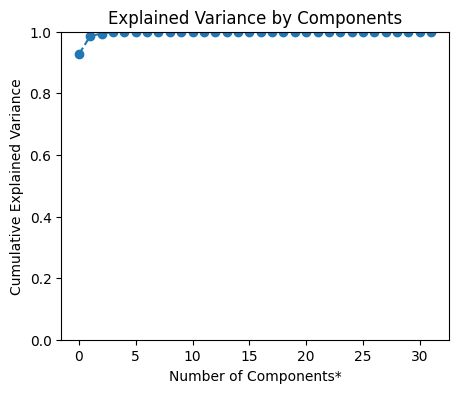

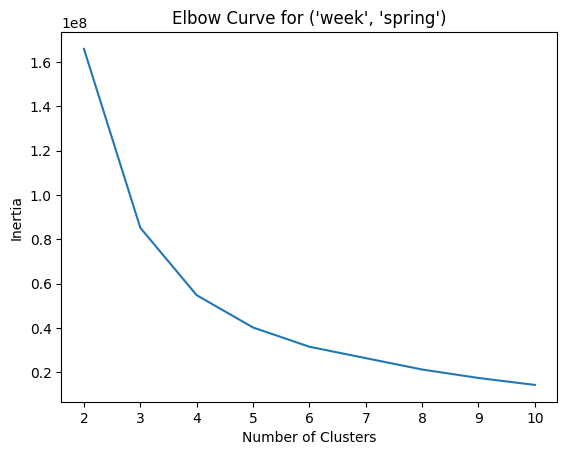

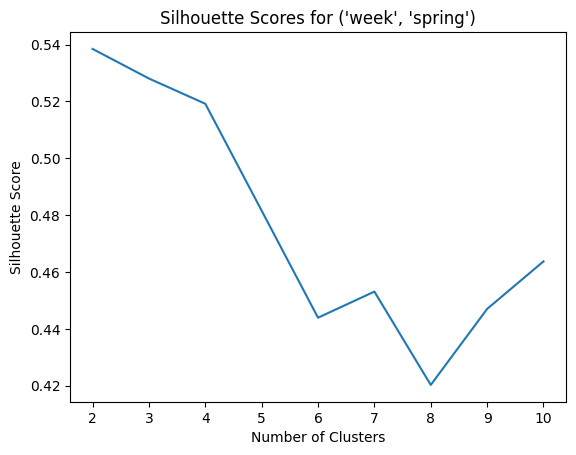

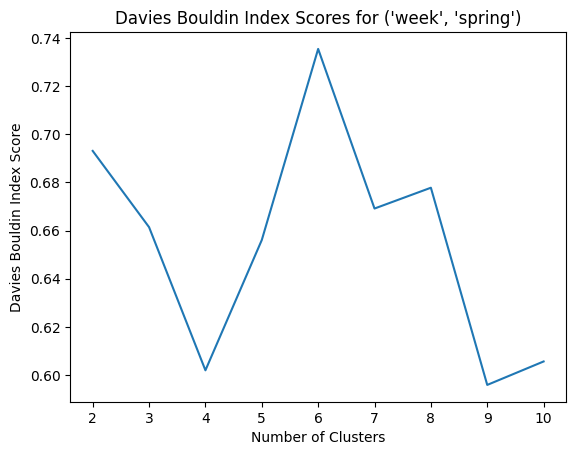

[0.9325 0.0518 0.0094 0.0049 0.0007 0.0003 0.0002 0.0001 0.0001 0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.    ]


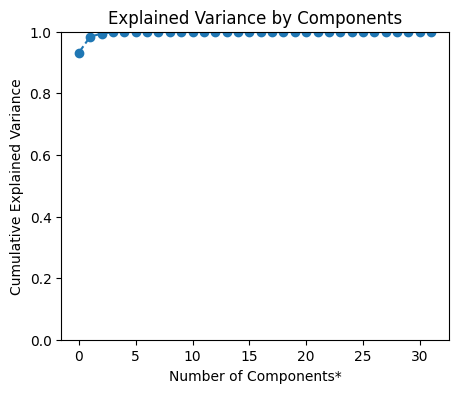

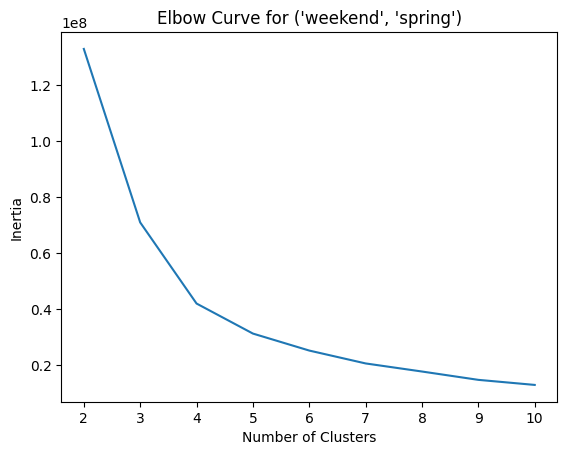

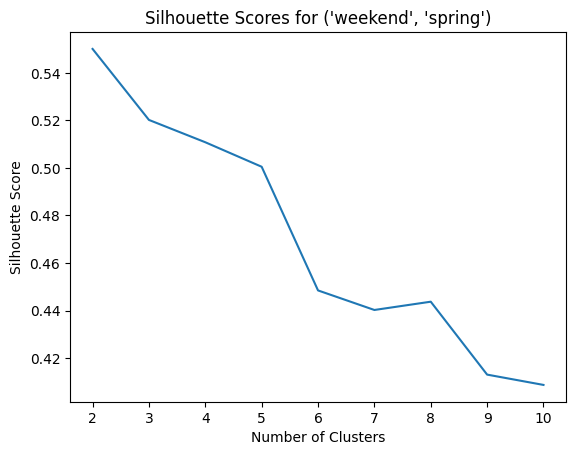

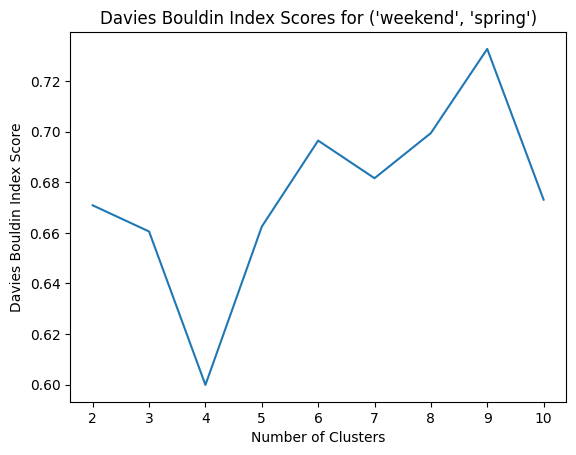

[0.9137 0.0795 0.0044 0.0015 0.0005 0.0002 0.0001 0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.    ]


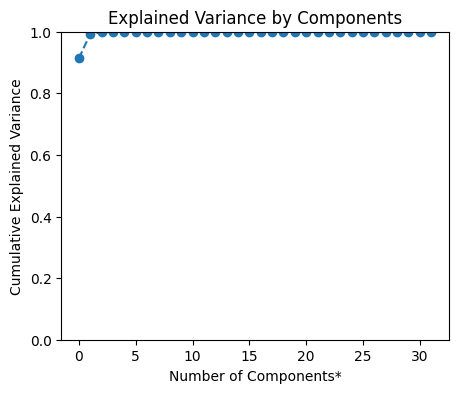

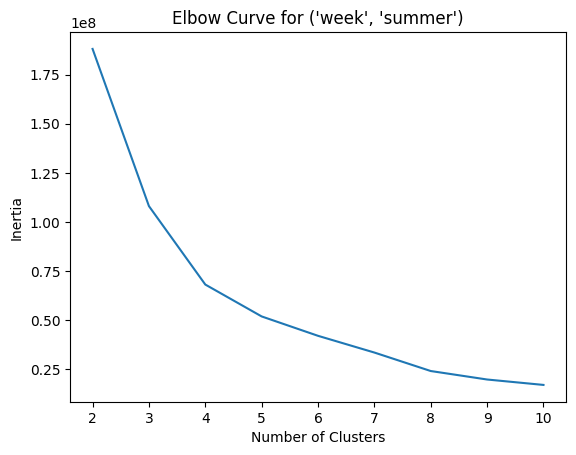

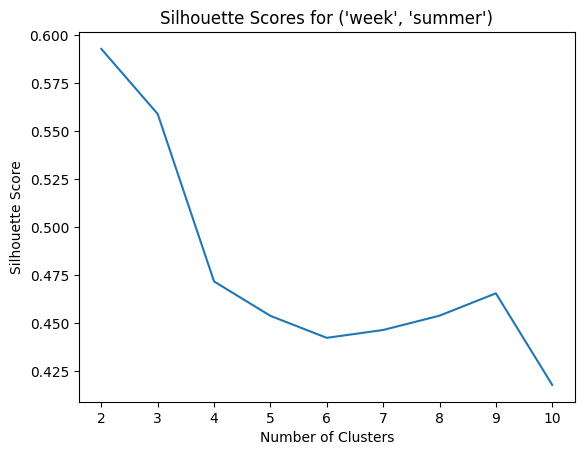

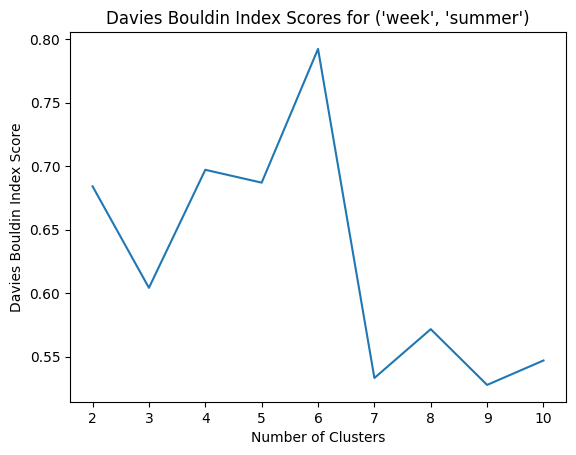

[0.8933 0.0964 0.0054 0.0035 0.001  0.0002 0.0001 0.0001 0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.    ]


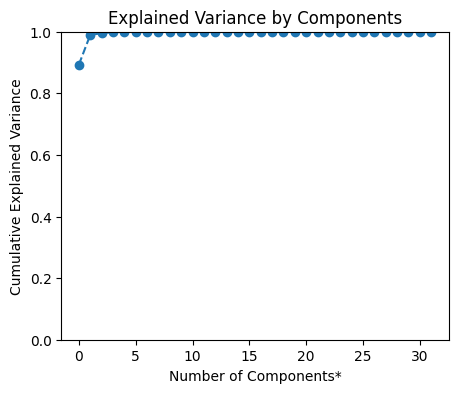

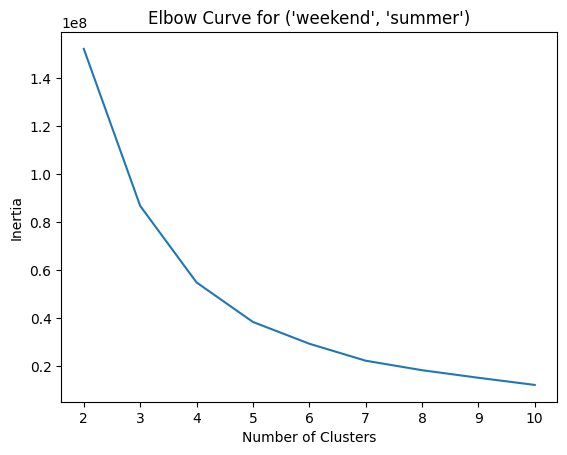

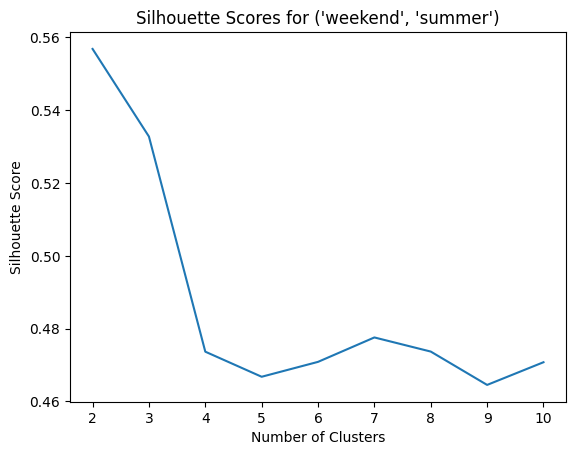

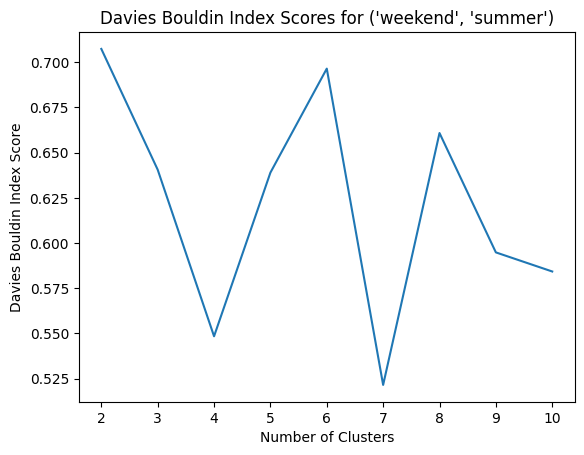

[0.918  0.0639 0.011  0.0036 0.0023 0.0007 0.0002 0.0002 0.0001 0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.    ]


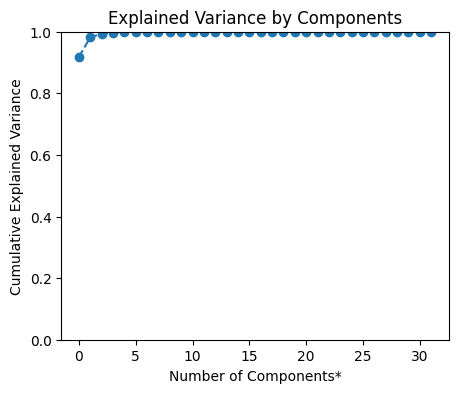

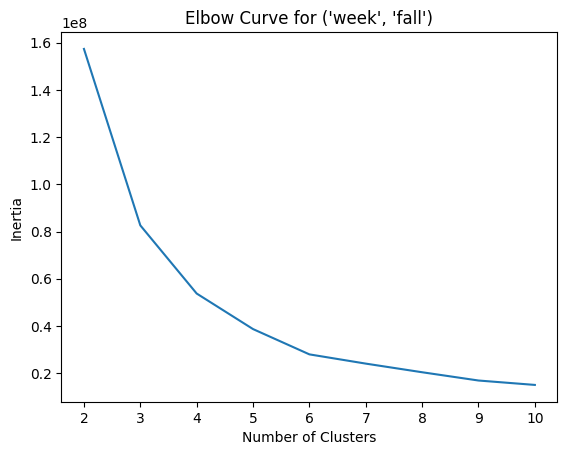

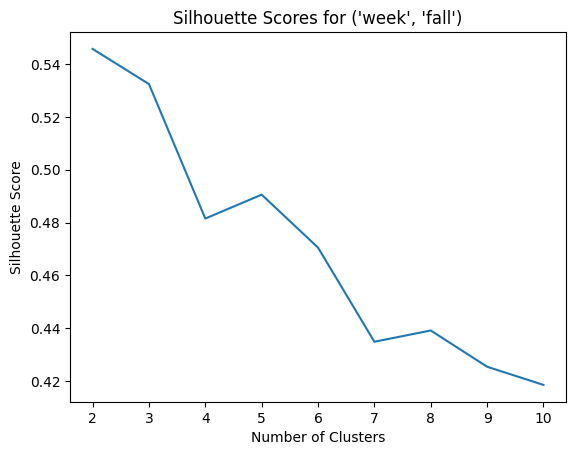

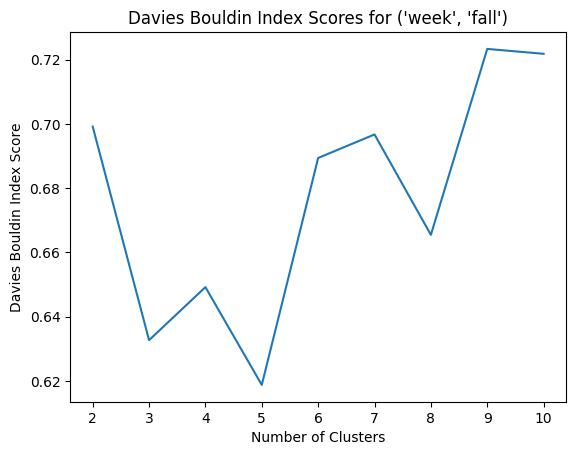

[0.9465 0.0399 0.01   0.0026 0.0004 0.0002 0.0001 0.0001 0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.    ]


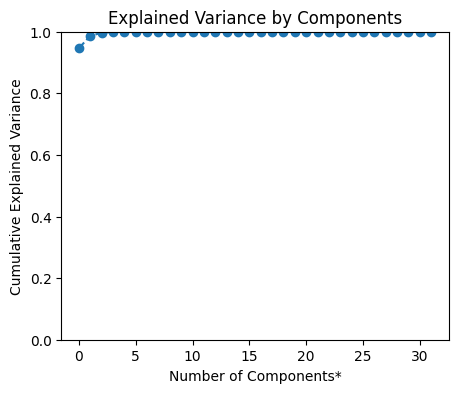

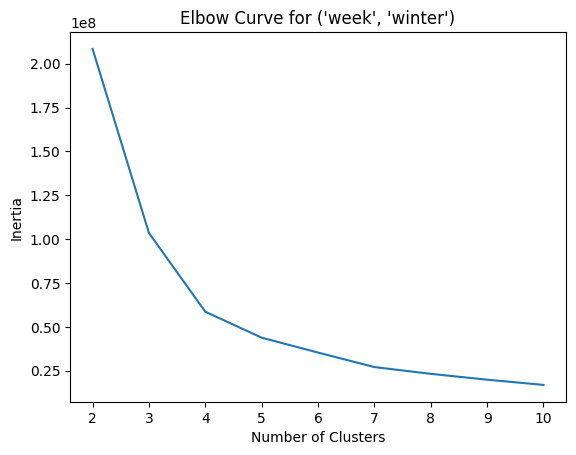

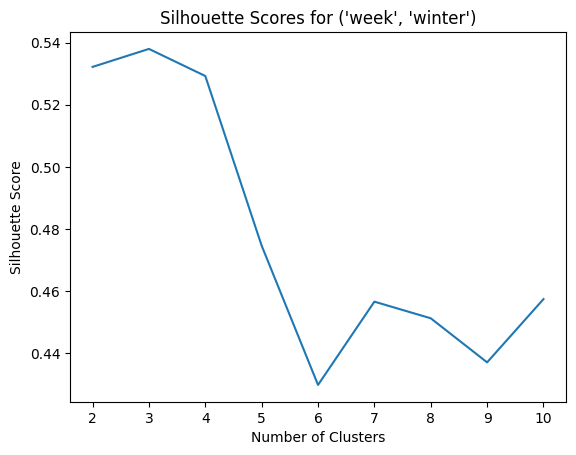

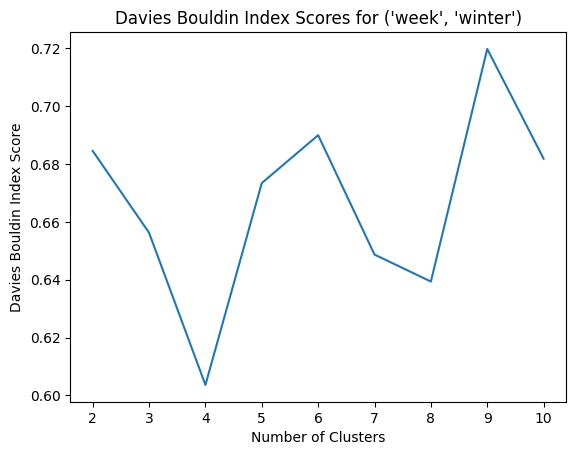

[0.9482 0.0352 0.0109 0.0046 0.0004 0.0004 0.0002 0.0001 0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.    ]


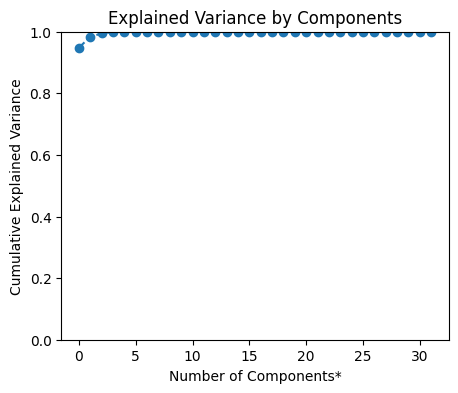

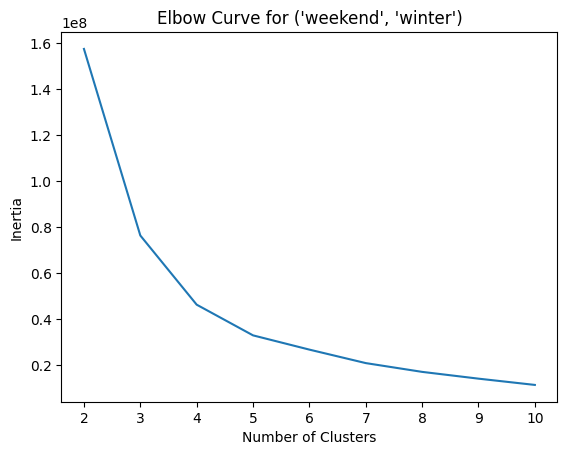

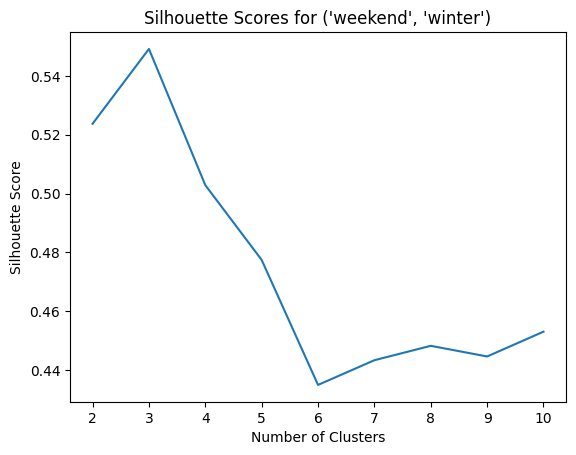

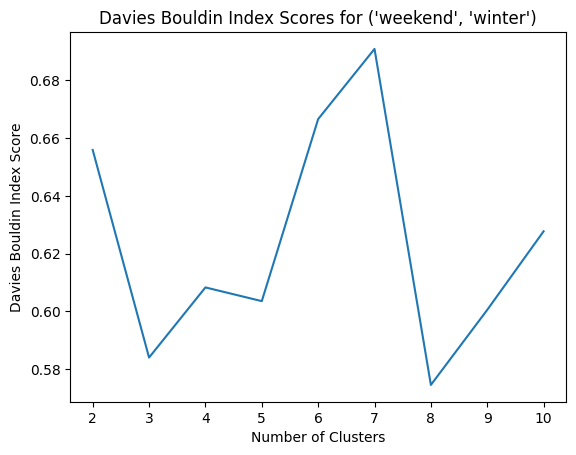

[0.9201 0.0671 0.007  0.0046 0.0006 0.0002 0.0001 0.0001 0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.    ]


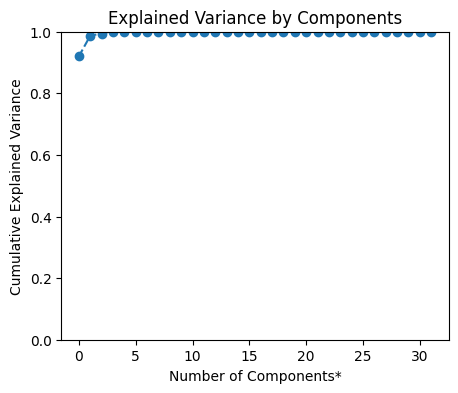

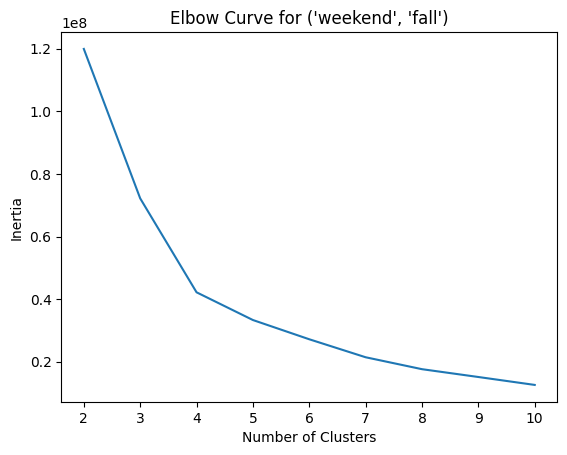

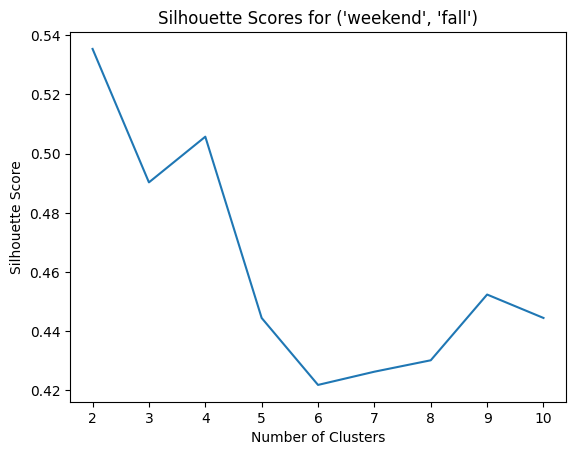

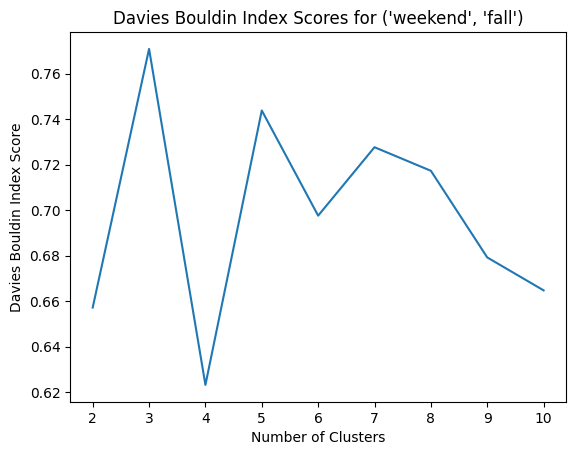

In [12]:

reload(substation_analysis_functions)

##### Read data ######

folder_path = "../Substation Busbar Data/"
dataframes, id_s = substation_analysis_functions.read_substation_data(folder_path)

######################################################################################################
#################################### Data Cleaning ##############################################
######################################################################################################


##### Data Cleaning: Handle missing Vals and bad power vals ######

dataframes = substation_analysis_functions.handle_missing_vals(dataframes, threshold = 0.5)
for substation, df in dataframes.items():
    dataframes[substation] = substation_analysis_functions.detect_bad_power_vals(df,active_upper_threshold = 700, active_lower_threshold = 0, reactive_upper_threshold = 250, reactive_lower_threshold = -100)   
    
##### Data Transformation: Split dataset by season ######

substation_dataframes = {}
for substation, df in dataframes.items():
    spring, summer, fall, winter = substation_analysis_functions.split_by_season(df)
    substation_dataframes[substation] = {'spring': spring, 'summer': summer, 'fall': fall, 'winter': winter}

##### Data Transformation: Split dataset by time of week ######

chopped_substation_dfs = {}
for substation, season_dict in substation_dataframes.items():
    chopped_substation_dfs[substation] = {}
    for season, df in season_dict.items():
        week_df, weekend_df = substation_analysis_functions.split_weekend_week(df)
        chopped_substation_dfs[substation][season] = {}
        chopped_substation_dfs[substation][season]['week'] = week_df
        chopped_substation_dfs[substation][season]['weekend'] = weekend_df
        
        
##### Data Cleaning; Drop substations that don't have enough data in a time-of-week/season combo ######

chopped_substation_dfs = substation_analysis_functions.drop_underful_substations(chopped_substation_dfs)



######################################################################################################
#################################### Feature Extraction ##############################################
######################################################################################################



# Define the time period labels
time_labels = [1, 2, 3, 4, 5, 1]
#time_labels = ['night', 'morning', 'midday', 'afternoon', 'evening', 'night']

# Define the time period intervals
time_intervals = [(0, 5), (5, 11), (11, 14), (14, 17), (17, 22), (22, 24)]

features_dataframes = substation_analysis_functions.create_substation_features_dataframes(chopped_substation_dfs, time_labels, time_intervals)


df_dict = substation_analysis_functions.split_into_seasonal_dfs(features_dataframes, global_active_features, global_reactive_features, peak_features)
# Access the dataframes using a tuple of (time_of_week, season) as the key
spring_weekday_df = df_dict[("week", "spring")]
spring_weekend_df = df_dict[("weekend", "spring")]
summer_weekday_df = df_dict[("week", "summer")]
summer_weekend_df = df_dict[("weekend", "summer")]
fall_weekday_df = df_dict[("week", "fall")]
fall_weekend_df = df_dict[("weekend", "fall")]
winter_weekday_df = df_dict[("week", "winter")]
winter_weekend_df = df_dict[("weekend", "winter")]


######################################################################################################
#################################### Clustering Analysis #############################################
######################################################################################################

pca_cluster_results = substation_analysis_functions.implement_pca_clustering(df_dict)
    

### Getting results for the report

[0.9268 0.0592 0.0081 0.005  0.0003 0.0003 0.0001 0.0001 0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.    ]


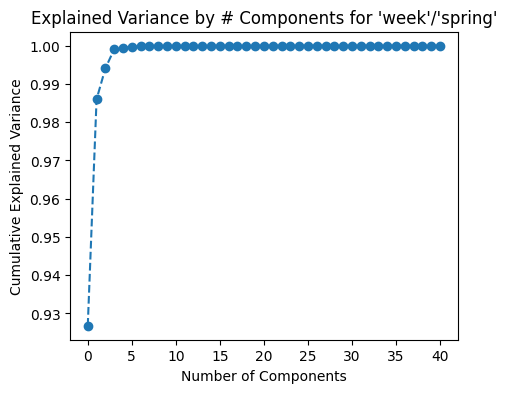

In [33]:
 reload(substation_analysis_functions)
 for key in df_dict.keys():
        
        # Put substation in index so that PCA can work (doesn't work with strings)
        df = df_dict[key].set_index('substation')
        if key == ('week', 'spring'):
              substation_analysis_functions.pca_plot(df, key)

In [13]:
features_dataframes = substation_analysis_functions.create_substation_features_dataframes(chopped_substation_dfs, time_labels, time_intervals)

/Users/Orie4416/Desktop/Energy Systems RAship/LEO/leo_substation_analysis/substation_analysis_functions.py:211: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Datetime'] = pd.to_datetime(df['Datetime'])
/Users/Orie4416/Desktop/Energy Systems RAship/LEO/leo_substation_analysis/substation_analysis_functions.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Datetime'].dt.date
/Users/Orie4416/Desktop/Energy Systems RAship/LEO/leo_substation_analysis/substation_analysis_functions.py:214: 

KeyboardInterrupt: 

## Exploratory plotting

<font color = 'lightgreen'> Data Cleaning - determine active and reactive power cutoffs</font>

In [ ]:
# Assume that the dictionary of dataframes is called "data"
# Concatenate all dataframes together into one big dataframe
hist_df = pd.concat(dataframes.values(), ignore_index=True)
print(hist_df['Active Power [kW]'].quantile(0.999), hist_df['Reactive Power [kVAr]'].quantile(0.999),hist_df['Reactive Power [kVAr]'].quantile(0.001))

for substation, df in dataframes.items():
    plt.hist(df['Reactive Power [kVAr]'], bins=200)
    plt.title("Reactive Power (kVAr) all substations all days")

plt.ylim(0,20)
plt.xlim(-199, 250)
plt.show()
for substation, df in dataframes.items():
    plt.hist(df['Active Power [kW]'], bins = 200)
    plt.title("Active Power (kW) all substations all days")
plt.ylim(0,20)
plt.xlim(-50, 750)
plt.show()

In [8]:
for k,v in df_dict:
    df = df_dict[k,v]
df

substation  \
0                 Gloucester Green   
1                  Hockmore Street   
2                osney mead pylon    
3   queens lane telephone exchange   
4                        Swan mews   
..                             ...   
83               george more close   
84                  banjo road tx2   
85                     priory rd 1   
86                     hazel grove   
87                   dashwood rise   

    Mean total daily load consumption Active Power [kW]  \
0                                         3478.288570     
1                                         2791.884679     
2                                         3087.017705     
3                                         1257.894623     
4                                         4060.139186     
..                                                ...     
83                                         522.496090     
84                                        3349.215729     
85                                        1592.857949     
86                                        2233.151949     
87                                         823.320962     

    Mean value of daily load pattern Active Power [kW]  \
0                                          162.577216    
1                                          116.167467    
2                                          130.072524    
3                                           52.663047    
4                                          176.989158    
..                                                ...    
83                                          22.286450    
84                                         139.337921    
85                                          66.261550    
86                                          94.410959    
87                                          34.250402    

    SD of daily load pattern Active Power [kW]  \
0                                    42.969496   
1                                    70.184480   
2                                    13.189074   
3                                    11.849227   
4                                    54.876900   
..                                         ...   
83                                    6.187417   
84                                   50.192213   
85                                   21.921701   
86                                   22.469562   
87                                   11.705746   

    Max power consumption during a day Active Power [kW]  \
0                                          267.070000      
1                                          255.986667      
2                                          200.210000      
3                                          111.307500      
4                                          354.236667      
..                                                ...      
83                                          44.580000      
84                                         237.364000      
85                                         132.555000      
86                                         183.781667      
87                                          92.445000      

    Min power consumption during a day Active Power [kW]  \
0                                           78.165625      
1                                           41.366667      
2                                           99.316667      
3                                           31.881000      
4                                           78.583333      
..                                                ...      
83                                           1.848333      
84                                          62.954000      
85                                          28.375000      
86                                          47.191667      
87                                          11.885000      

    Range of power consumption during a day (max - min) Active Power [kW]  \
0                                        

<font color = 'lightgreen'> Feature Correlation Matrix <font>

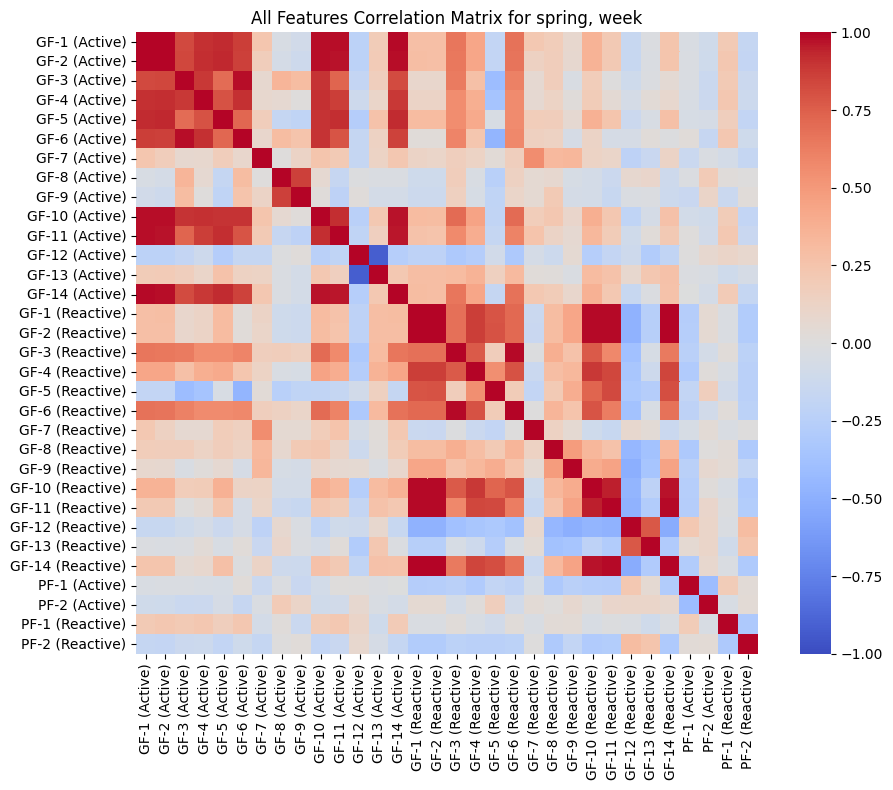

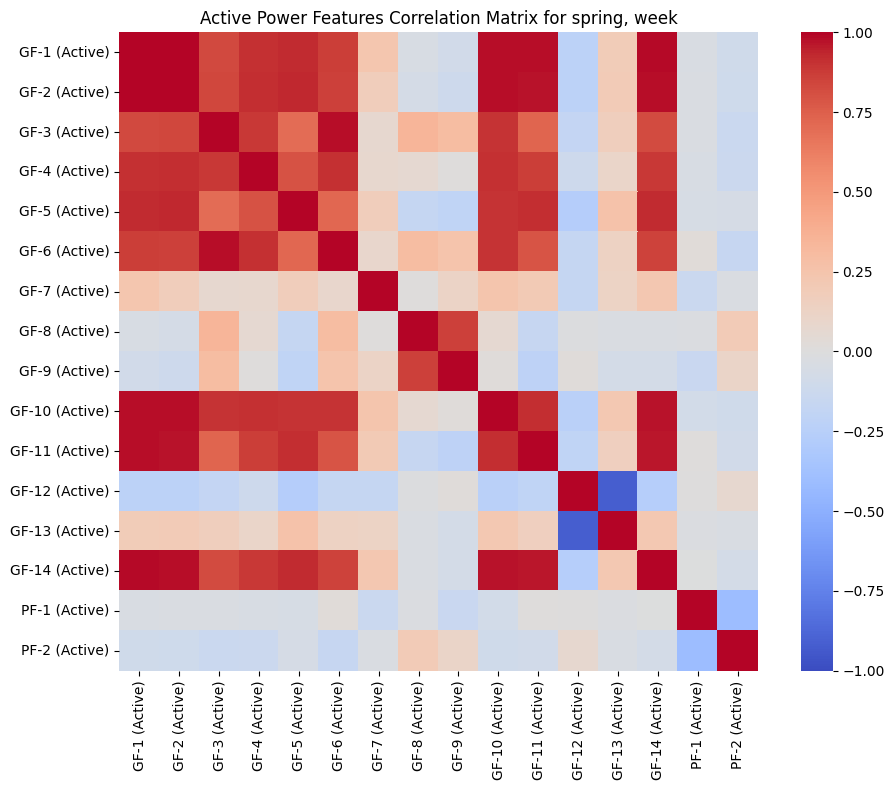

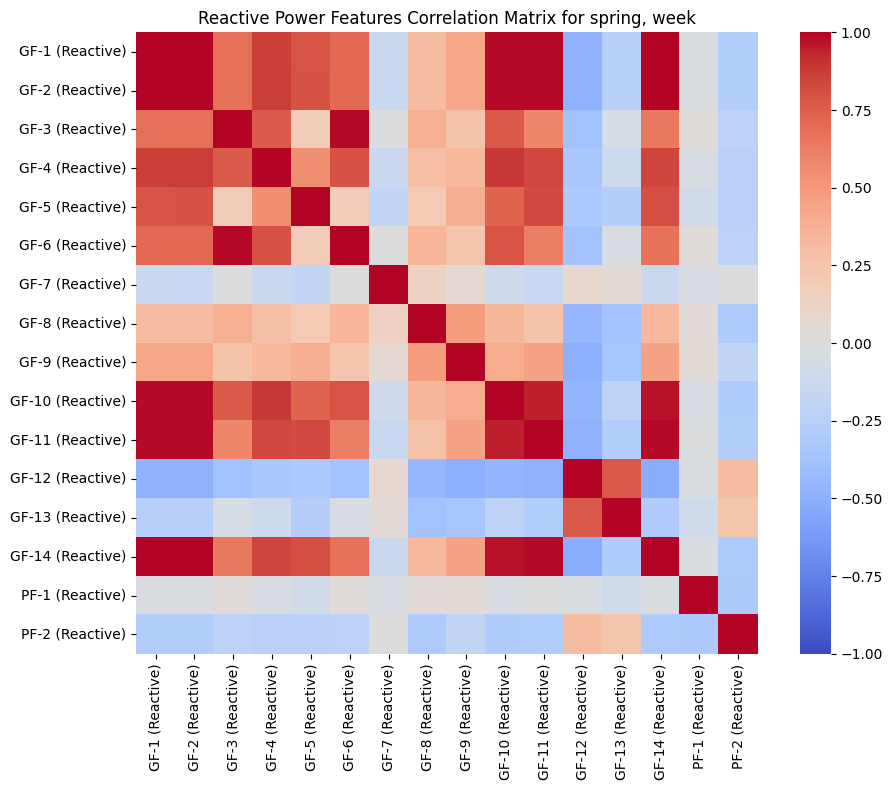

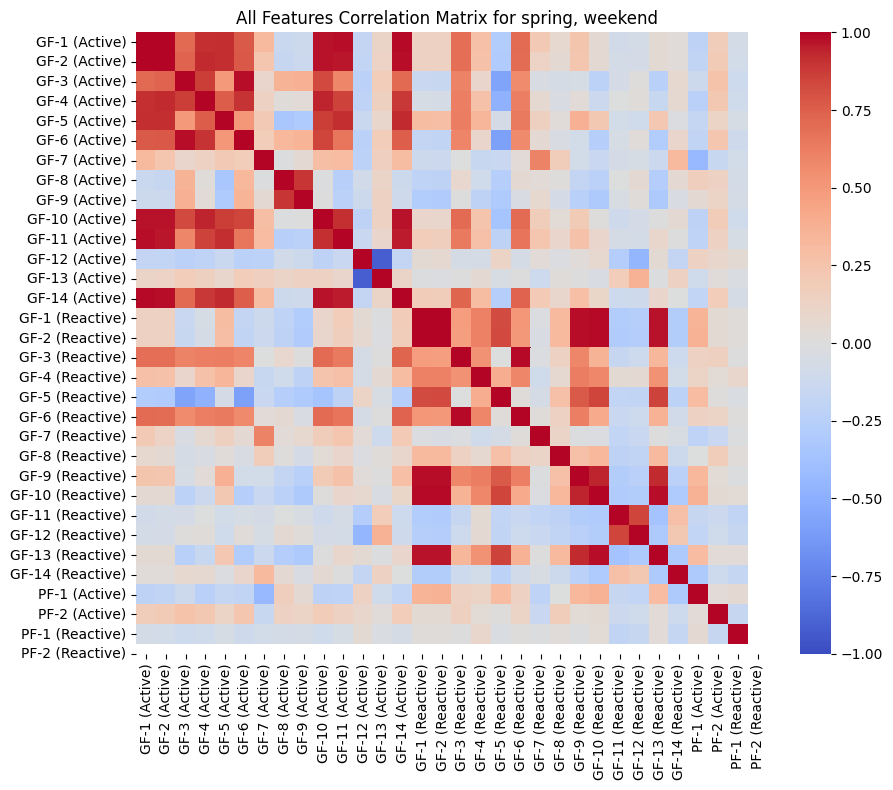

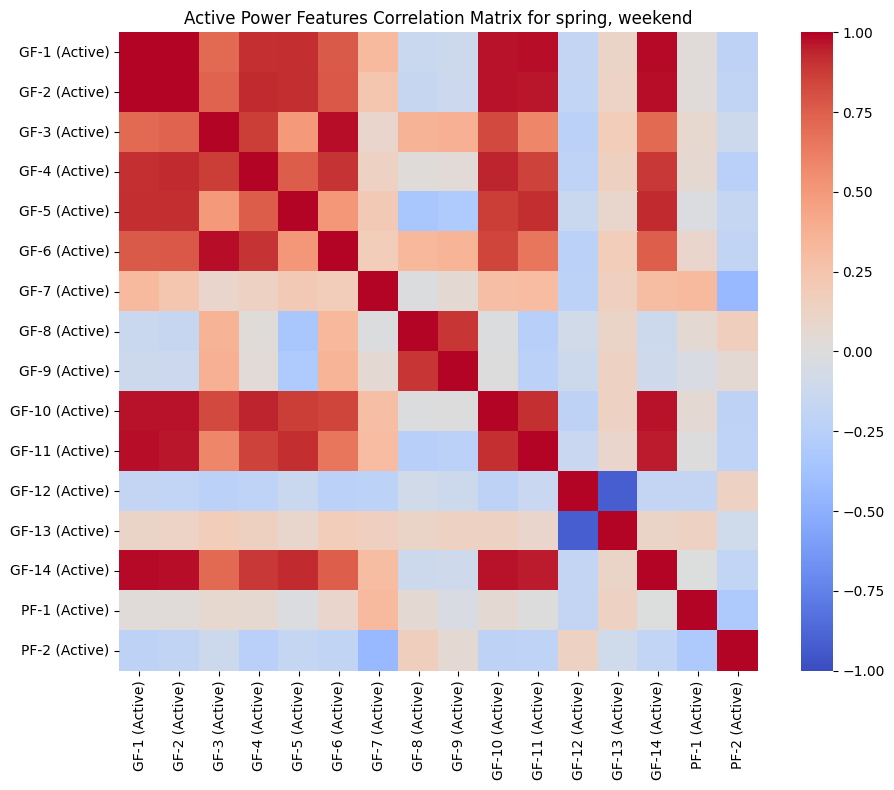

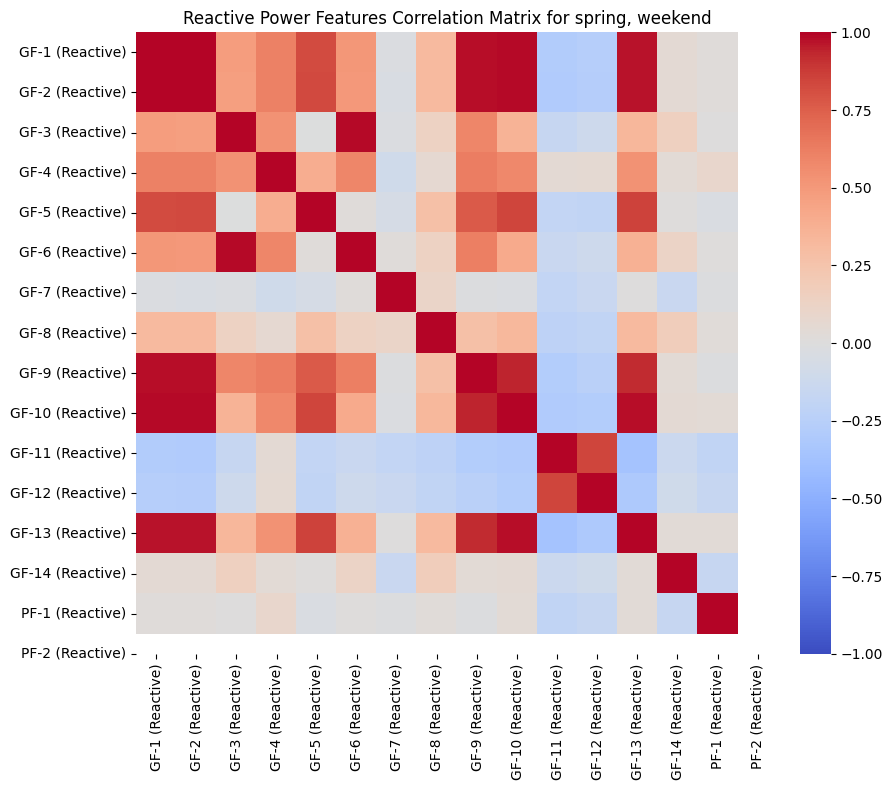

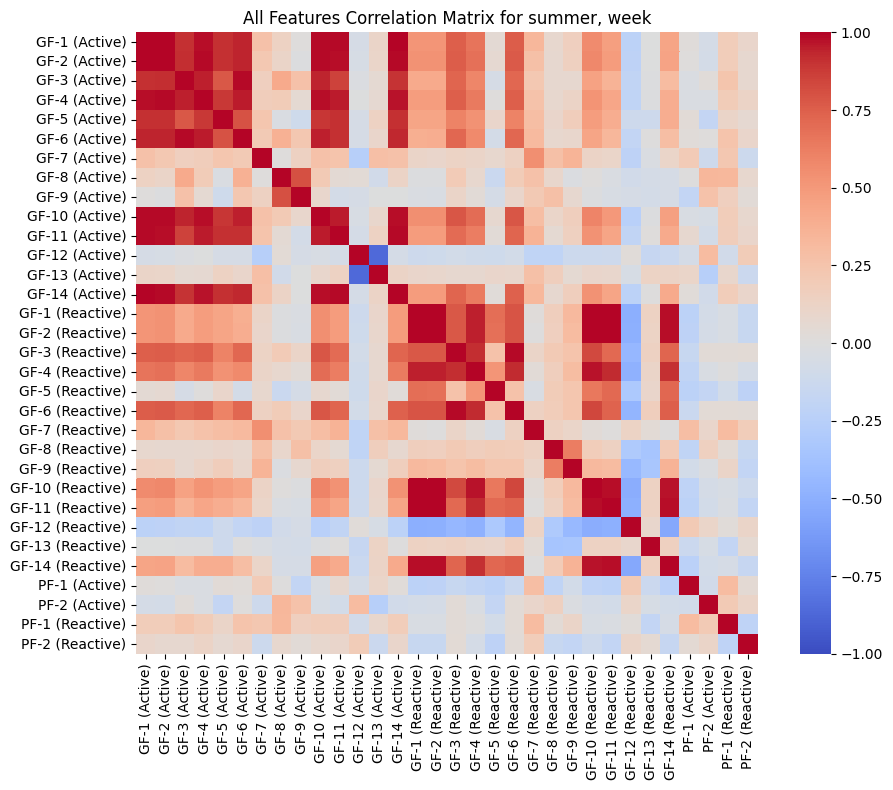

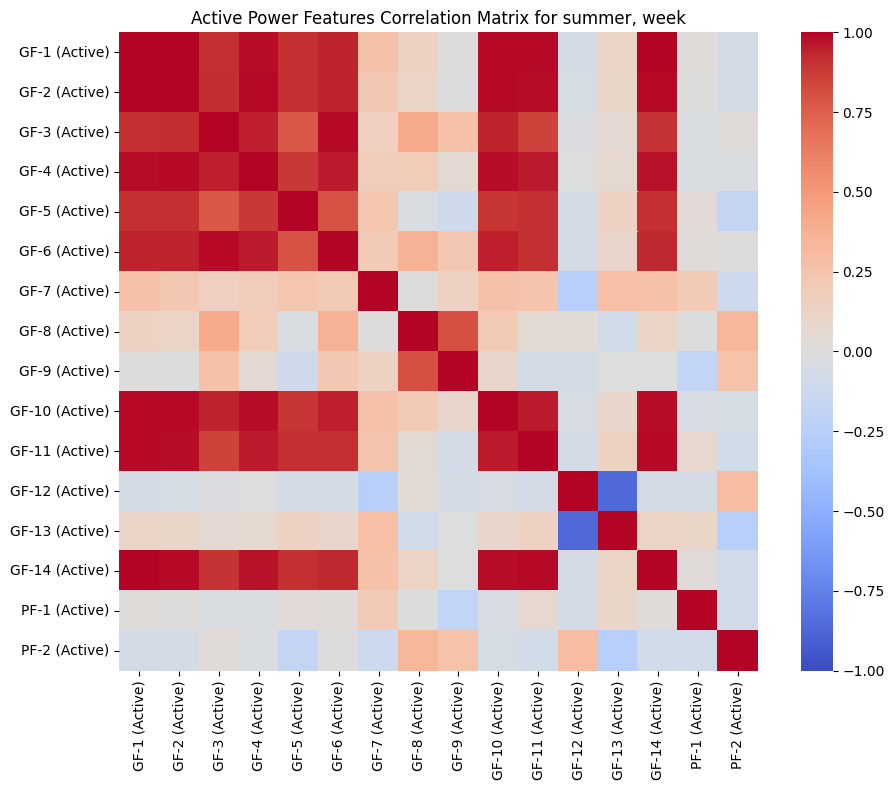

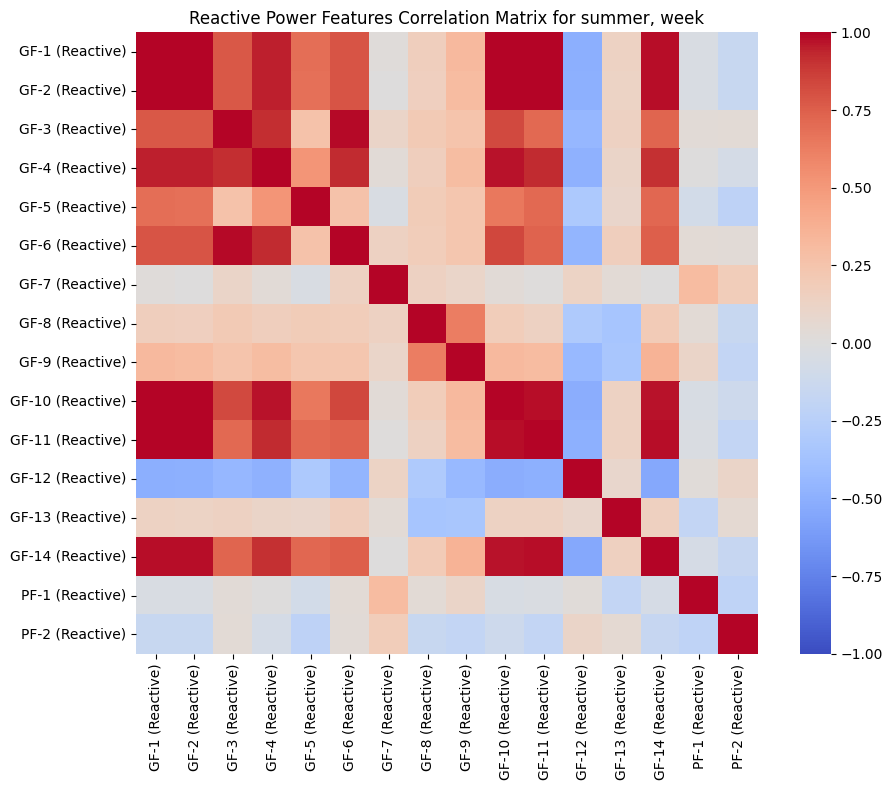

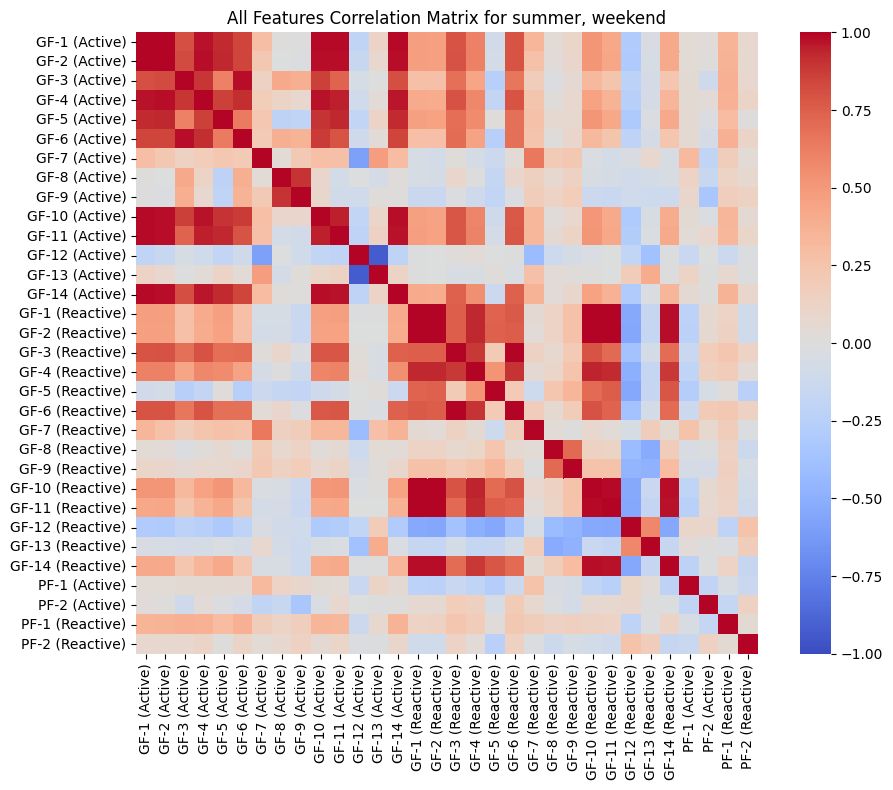

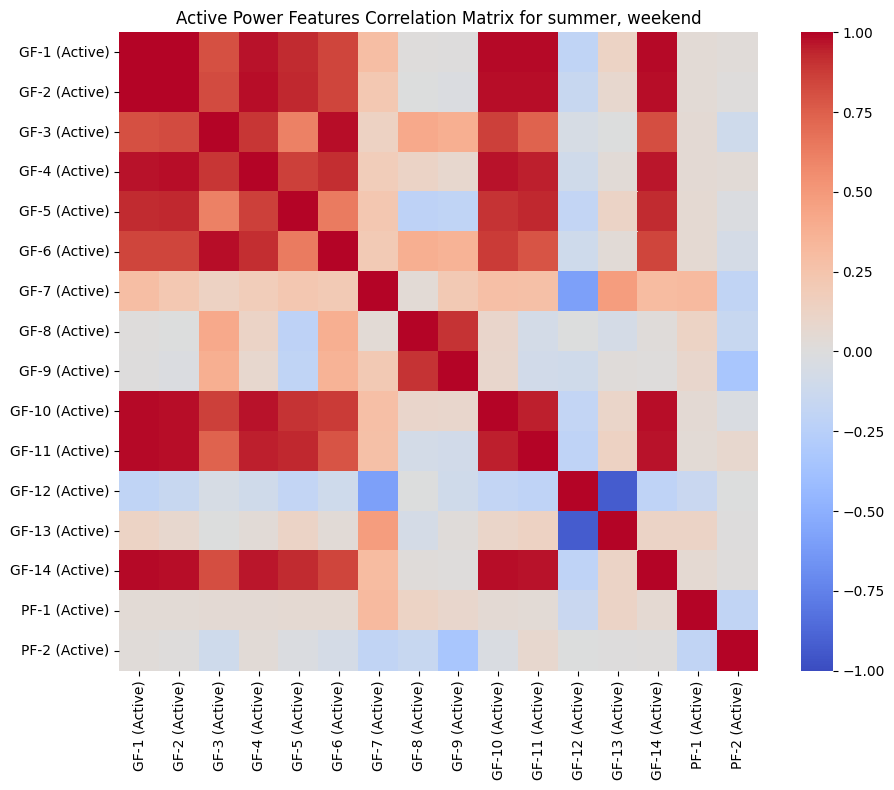

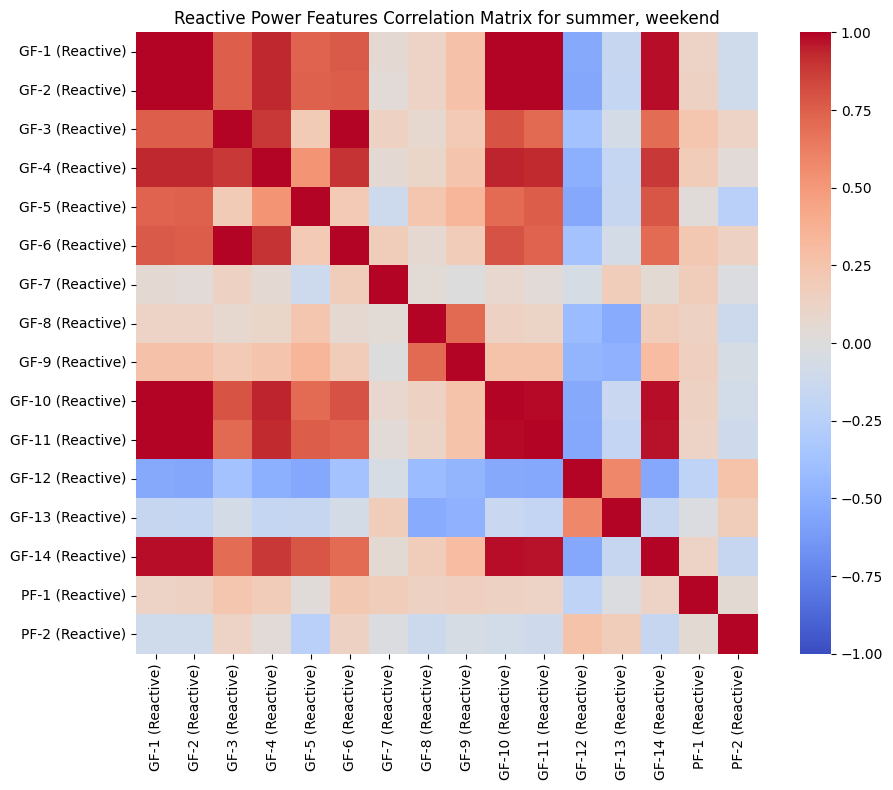

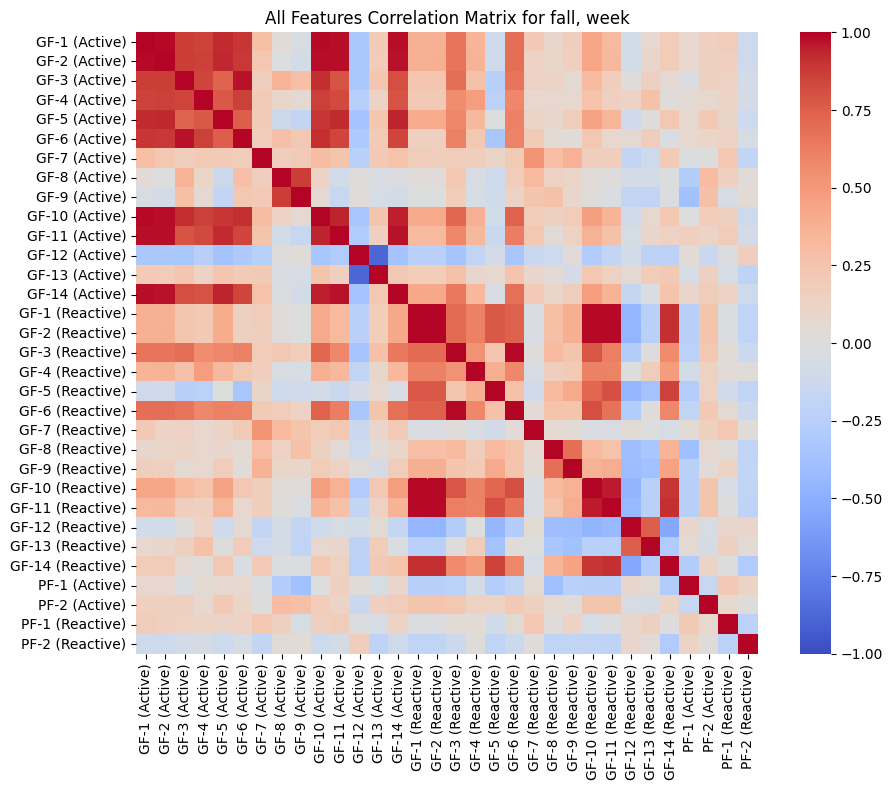

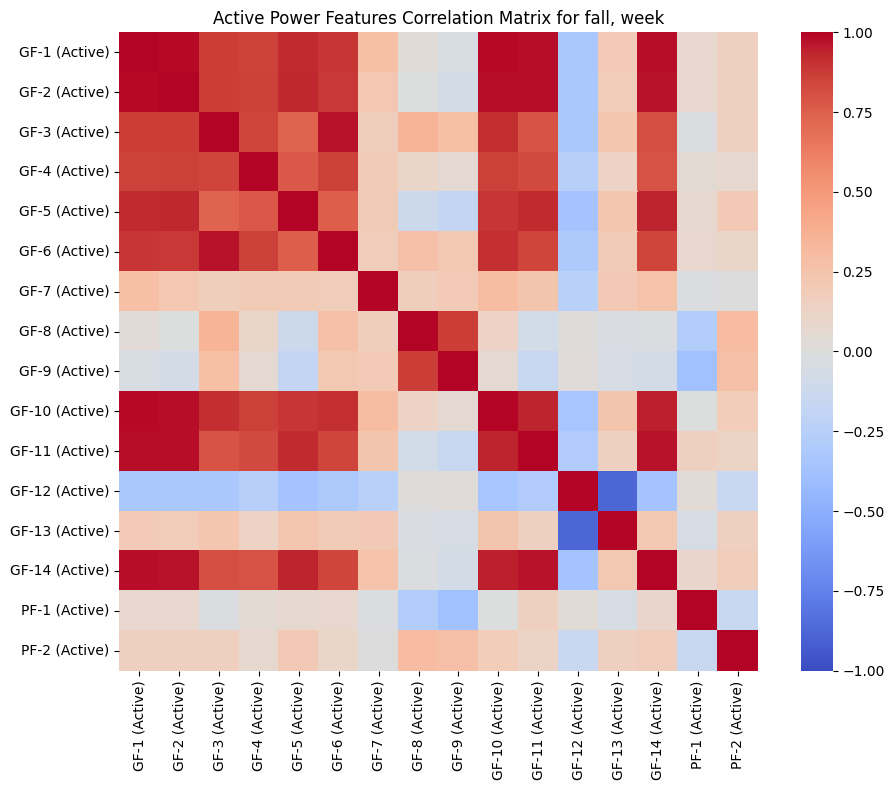

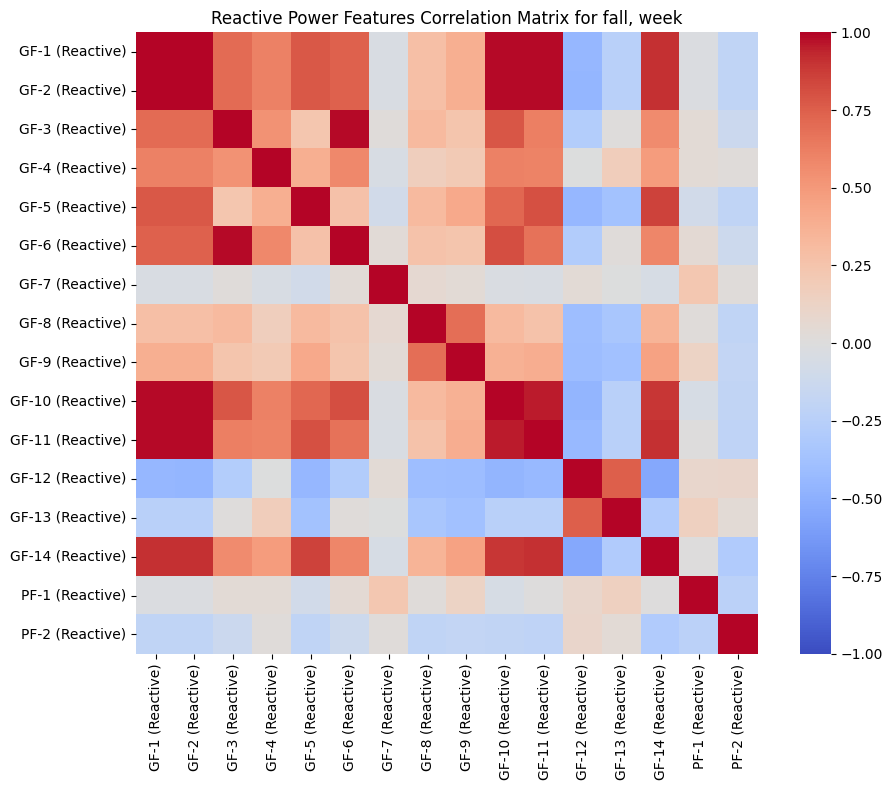

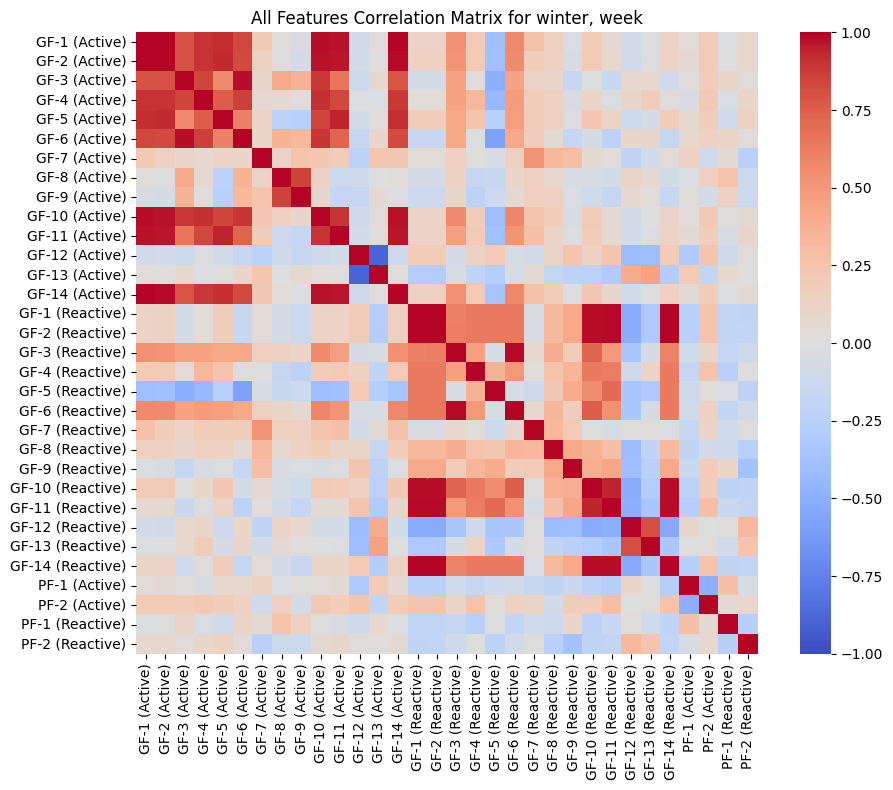

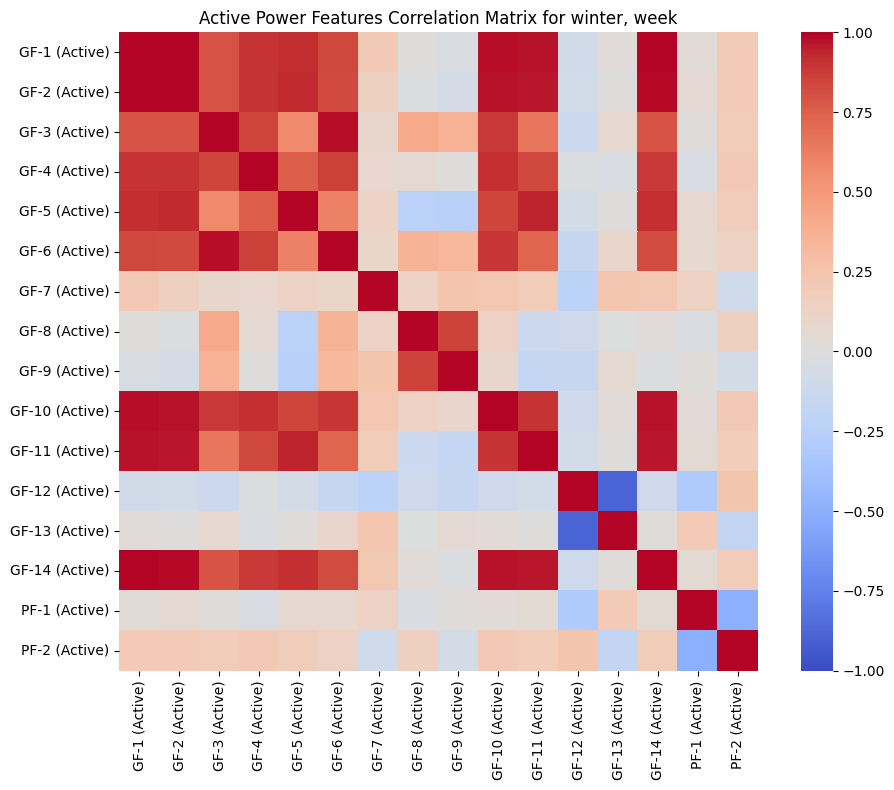

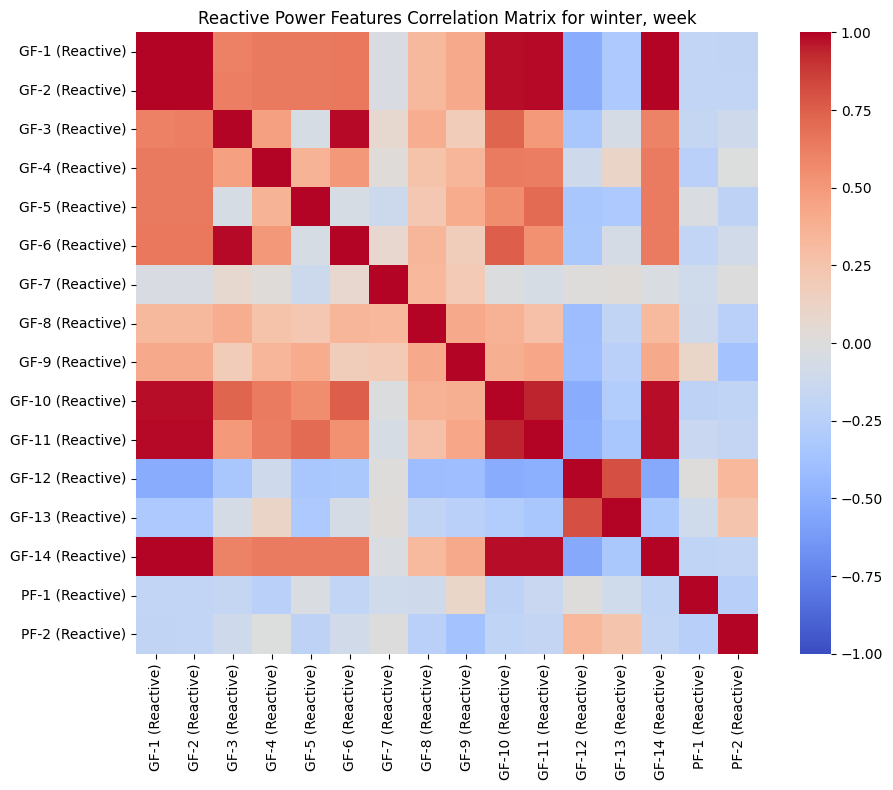

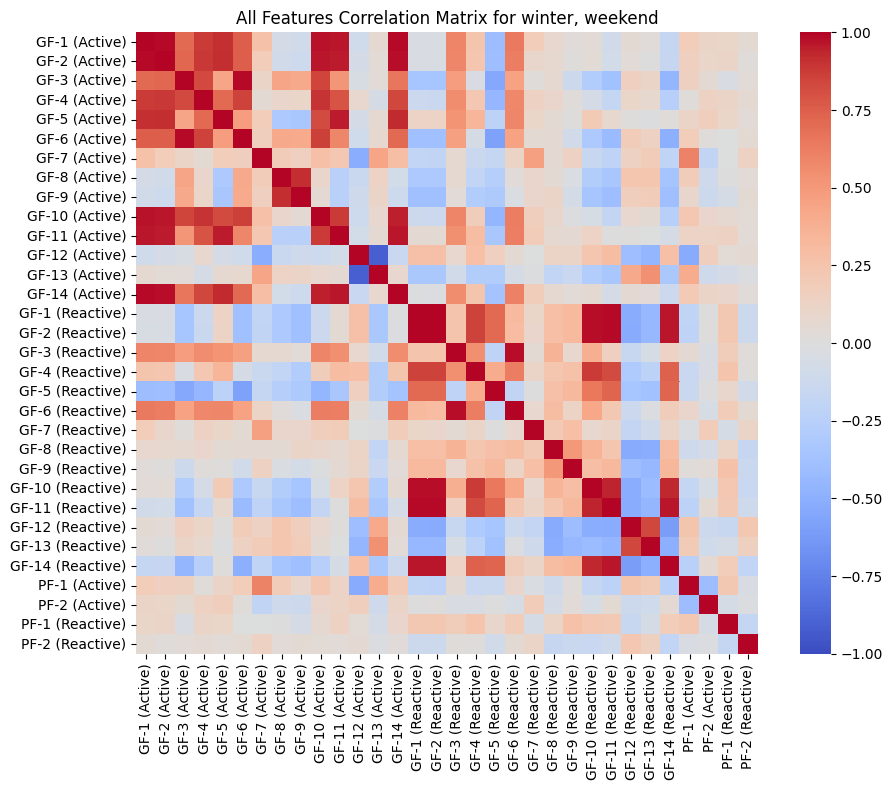

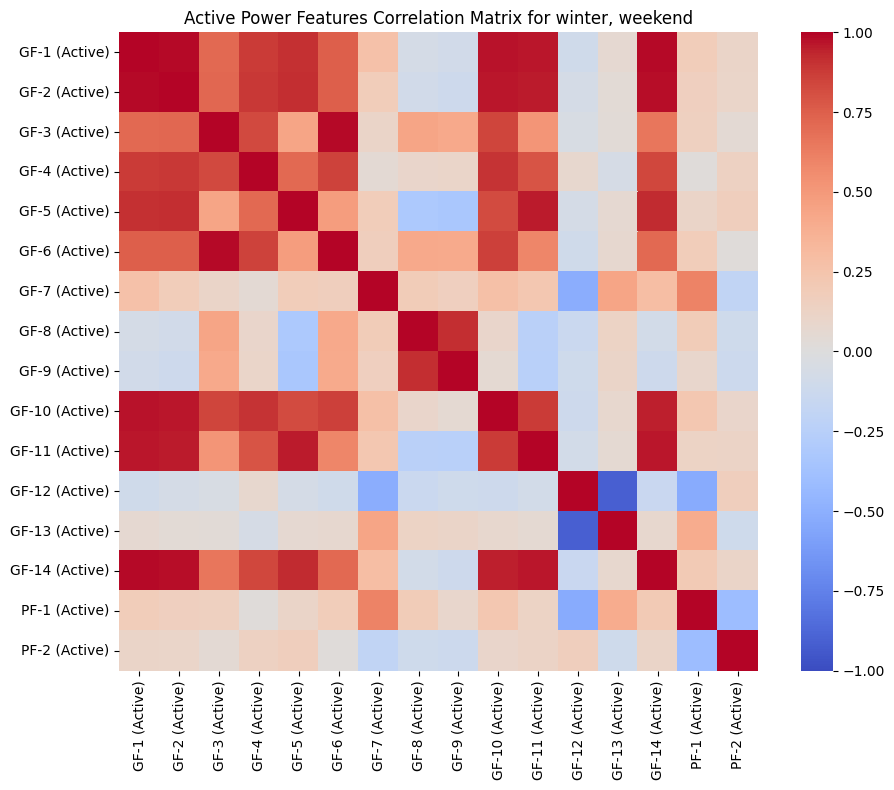

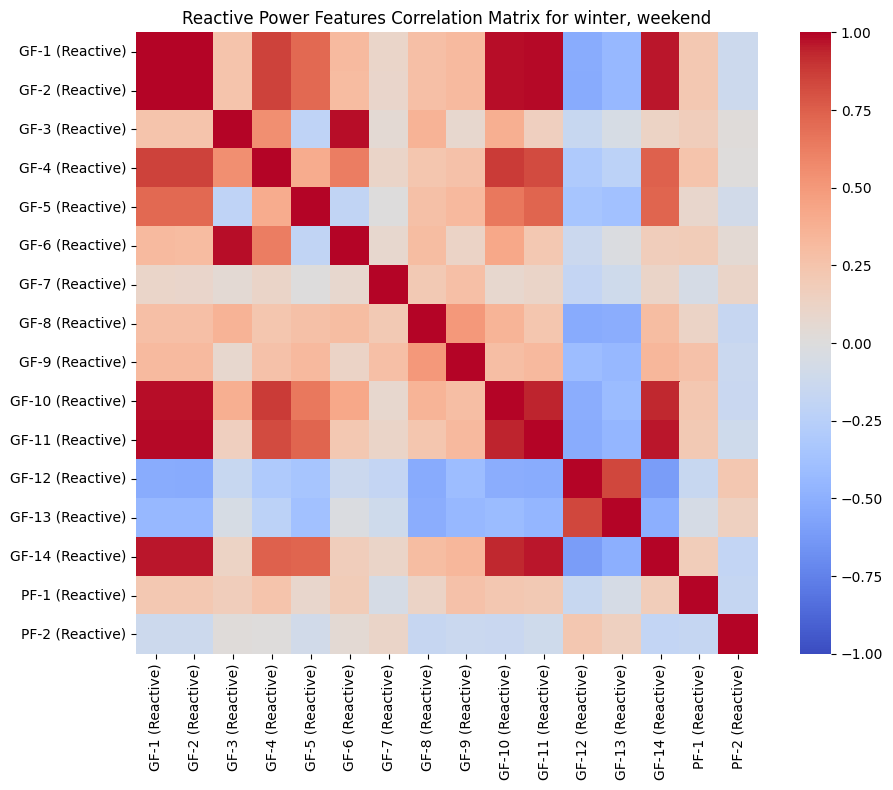

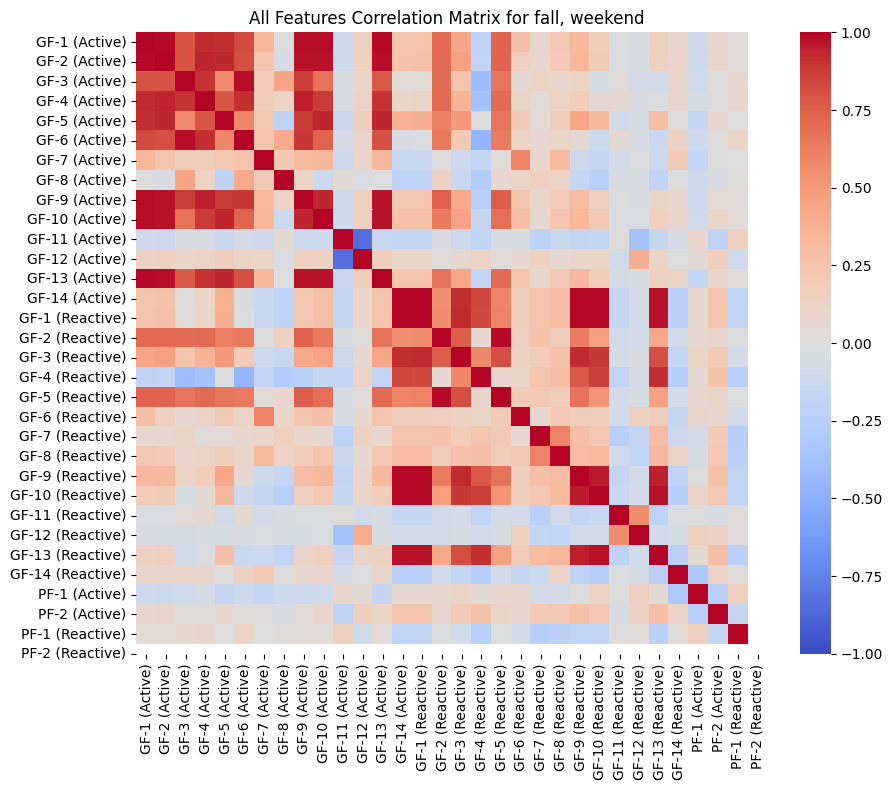

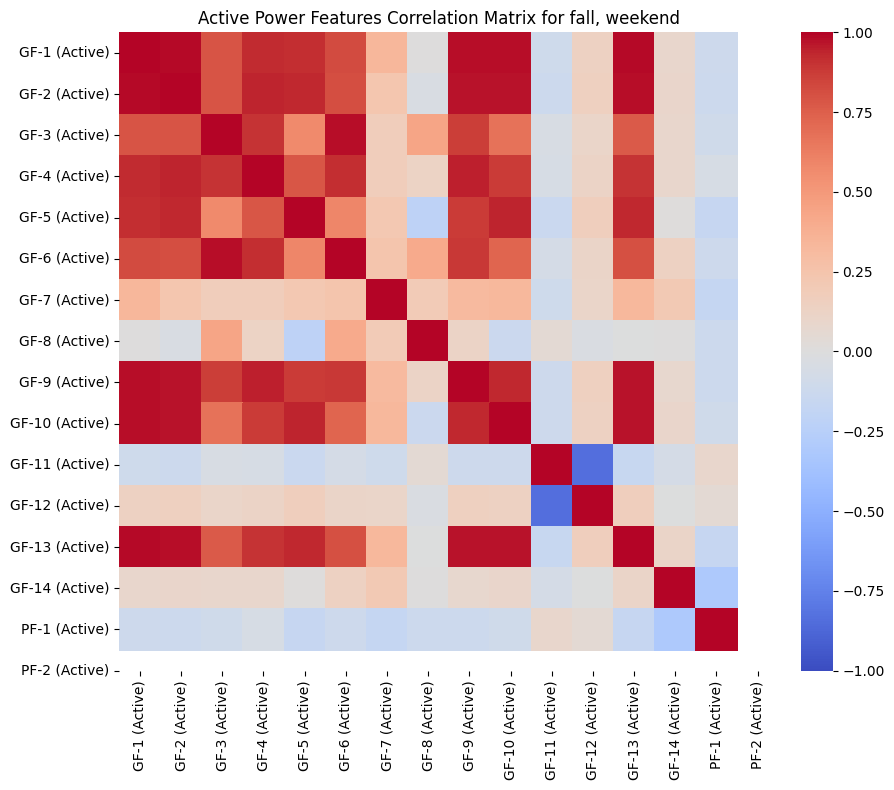

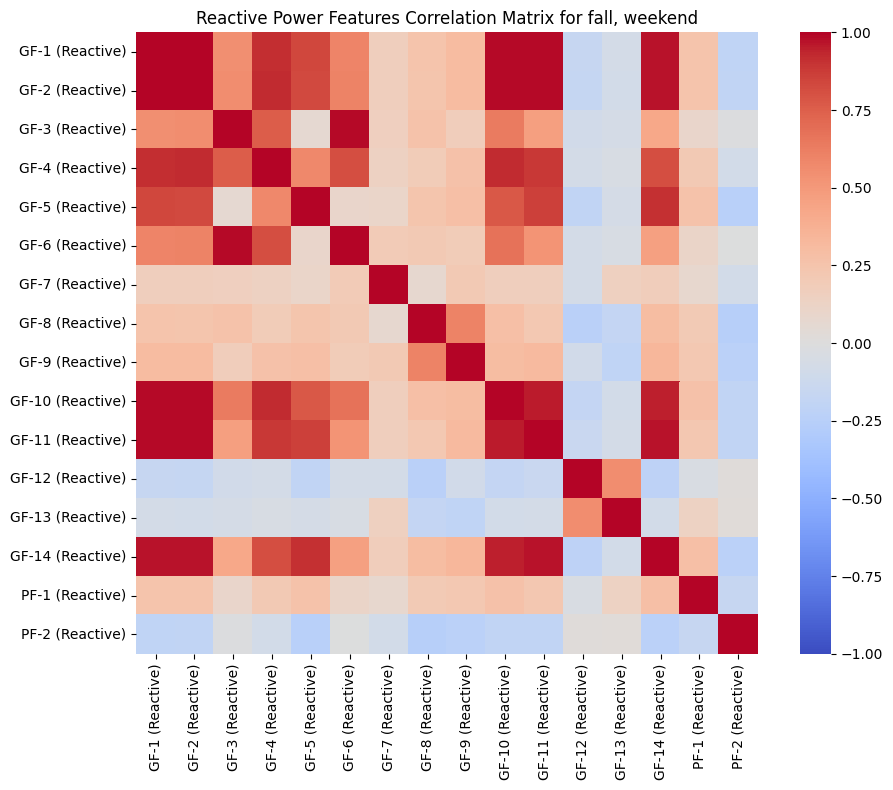

In [6]:
substation_analysis_functions.plot_correlation_matrices(df_dict, global_active_features, global_reactive_features)

## <font color='pink'> Extract features using IFEEL (maybe pursue later) </font>

In [ ]:
df_test = dataframes['Gloucester lane tx 1']

# Drop all unneeded columns
df_test = df_test[['Active Power [kW]', 'Datetime']]

# Drop last row from df_test
df_test = df_test[:-1]

# create a new column with the date only
df_test['Date'] = df_test['Datetime'].dt.date

# create a new column with the hour of the day
df_test['Hour'] = df_test['Datetime'].dt.hour

# identify duplicate rows based on "Date" and "Hour" columns
duplicates = df_test[df_test.duplicated(['Date', 'Hour'], keep=False)]
# Drop duplicates
df_test = df_test.drop_duplicates(['Date', 'Hour'])

#df_test.drop_duplicates(subset=['Date', 'Hour'], keep='first', inplace=True)


# Transform data from long to wide, so that date is the index and each column is a different time



df_pivot = df_test.pivot(index = 'Date', columns= 'Hour', values = 'Active Power [kW]')

# display the result
# convert integer columns to string
df_pivot.columns = df_pivot.columns.astype(str)
# convert columns to strings with format '%H:%M:%S'
df_pivot.columns = [str(hour) + ':00:00' if len(hour) > 1 else '0' + str(hour) + ':00:00' for hour in df_pivot.columns ]

df_pivot.columns



In [ ]:
# This is a demonstration case, which shows how to use IFEEL to extract interpretable features of electricity loads.
# The test dataset at different time intervals can be downloaded from https://github.com/chacehoo/IFEEL/tree/main/Test_Data
# The downloaded datasets need to be placed under the current working directory.




# # Read the downloaded data
# # df_test = pd.read_csv("IFEEL_test_data_1month_1hour.csv", header=0,index_col=0, parse_dates=False 
 
 #df_test = pd.read_csv("IFEEL/Test_Data/IFEEL_test_data_1month_30mins.csv", header=0,index_col=0, parse_dates=False)
# # df_test = pd.read_csv("IFEEL_test_data_1month_2hours.csv", header=0,index_col=0, parse_dates=False)


from IFEEL import ifeel_transformation, ifeel_extraction


# You can check the names of all global and peak-period features here.
feature_name_global = ifeel_extraction.feature_name_global
feature_name_peak = ifeel_extraction.feature_name_peak

df_test = dataframes['Gloucester lane tx 1']

# Drop all unneeded columns
df_test = df_test[['Active Power [kW]', 'Datetime']]

# Drop last row from df_test
df_test = df_test[:-1]

# create a new column with the date only
df_test['Date'] = df_test['Datetime'].dt.date

# create a new column with the hour of the day
df_test['Hour'] = df_test['Datetime'].dt.hour

# identify duplicate rows based on "Date" and "Hour" columns
duplicates = df_test[df_test.duplicated(['Date', 'Hour'], keep=False)]
# Drop duplicates
df_test = df_test.drop_duplicates(['Date', 'Hour'])

#df_test.drop_duplicates(subset=['Date', 'Hour'], keep='first', inplace=True)


# Transform data from long to wide, so that date is the index and each column is a different time
df_pivot = df_test.pivot(index = 'Date', columns= 'Hour', values = 'Active Power [kW]')

# display the result
# convert integer columns to string
df_pivot.columns = df_pivot.columns.astype(str)

# convert columns to strings with format '%H:%M:%S'
df_pivot.columns = [str(hour) + ':00:00' if len(hour) > 1 else '0' + str(hour) + ':00:00' for hour in df_pivot.columns ]



sample_interval_in_hour = 24/df_pivot.shape[1]
# note: the value of sample interval is in the unit of hour, e.g., if the interval is 30 mins, then sample_interval = 0.5.

# Parameter setting
# Business hours here are from 9 am to 5 pm
time_business_start = 9
time_business_end = 17
alphabet_size = 7    # alphabet size of SAX representation

# Data transformation
[df_raw, df_raw_diff, df_SAX_number, df_SAX_alphabet, df_SAX_number_diff] = ifeel_transformation.feature_transformation(df_pivot, alphabet_size,time_business_start,time_business_end)


# Global feature extraction for each daily profile
feature_global_all_days = pd.DataFrame()
for i in np.arange(0, df_raw.shape[0]):
    ts = df_raw.iloc[i]
    ts_diff = df_raw_diff.iloc[i]
    feature_global_all_each = ifeel_extraction.feature_global(ts, ts_diff, sample_interval_in_hour).global_all().T
    feature_global_all_days = feature_global_all_days.append(feature_global_all_each, ignore_index=True)

feature_global_all_days.columns = ifeel_extraction.feature_name_global
feature_global_all_days.head()

# Peak feature extraction for each daily profile
feature_peak_period_all_days = pd.DataFrame()
for i in np.arange(0, df_raw.shape[0]):
    ts_sax = df_SAX_number.iloc[i]
    ts_sax_diff = df_SAX_number_diff.iloc[i]
    feature_peak_all_each = ifeel_extraction.feature_peak_period(ts_sax, ts_sax_diff,alphabet_size, sample_interval_in_hour).T
    feature_peak_period_all_days = feature_peak_period_all_days.append(feature_peak_all_each, ignore_index=True)

feature_peak_period_all_days.columns = ifeel_extraction.feature_name_peak
feature_global_all_days.head()

## <font color = 'lightgreen'> PCA + Clustering <font>

<font color = 'lightgreen'>  FUNCTION: Print and plot PCA results for each dataset to determine number of components to cluster on </font> 

<font color = 'lightgreen'> Implementation: Cluster on Principle Component Scores <font>

In [ ]:
pca_cluster_results = substation_analysis_functions.implement_pca_clustering(df_dict)

### For report

In [127]:
#df_dict = substation_analysis_functions.split_into_seasonal_dfs(features_dataframes, global_active_features, global_reactive_features, peak_features)
df_dict[('week', 'spring')]

substation  \
0                    Mill St flats   
1                 Gloucester Green   
2                  Hockmore Street   
3                osney mead pylon    
4   queens lane telephone exchange   
..                             ...   
78           barns road car park 2   
79               george more close   
80                     priory rd 1   
81                     hazel grove   
82                   dashwood rise   

    Mean total daily load consumption Active Power [kW]  \
0                                          246.168464     
1                                         3840.550719     
2                                         3265.522484     
3                                         4180.446723     
4                                         1311.504615     
..                                                ...     
78                                         493.680429     
79                                         786.173611     
80                                        1596.457411     
81                                        2220.988944     
82                                         879.481808     

    Mean value of daily load pattern Active Power [kW]  \
0                                           10.617100    
1                                          161.817273    
2                                          136.663111    
3                                          174.185280    
4                                           55.369142    
..                                                ...    
78                                          20.835925    
79                                          32.757234    
80                                          66.594177    
81                                          93.413281    
82                                          36.645075    

    SD of daily load pattern Active Power [kW]  \
0                                     4.391973   
1                                    38.433888   
2                                    82.605919   
3                                    40.304730   
4                                    11.178007   
..                                         ...   
78                                   12.184655   
79                                    9.561884   
80                                   19.455482   
81                                   24.482235   
82                                   11.962554   

    Max power consumption during a day Active Power [kW]  \
0                                          113.545000      
1                                          249.697500      
2                                          280.460000      
3                                          299.366667      
4                                          117.869500      
..                                                ...      
78                                          42.706667      
79                                          70.025000      
80                                         133.173333      
81                                         180.908333      
82                                          89.210000      

    Min power consumption during a day Active Power [kW]  \
0                                            0.000000      
1                                           88.952500      
2                                           44.896667      
3                                           83.960000      
4                                           27.769500      
..                                                ...      
78                                           4.351667      
79                                           0.120000      
80                                          29.850000      
81                                          32.336667      
82                                          13.398333      

    Range of power consumption during a day (max - min) Active Power [kW]  \
0                                        

[0.9268 0.0592 0.0081 0.005  0.0003 0.0003 0.0001 0.0001 0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.    ]


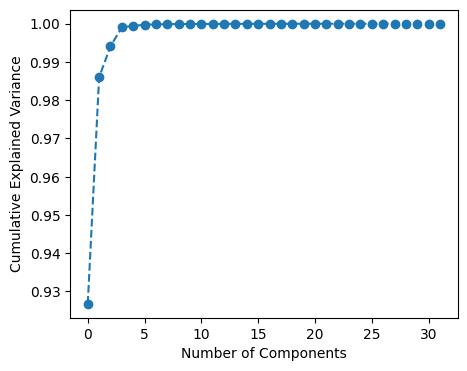

In [260]:
reload(substation_analysis_functions)
df = df_dict[('week', 'spring')]
df = df.set_index('substation')
substation_analysis_functions.pca_plot(df, key = 'peak')

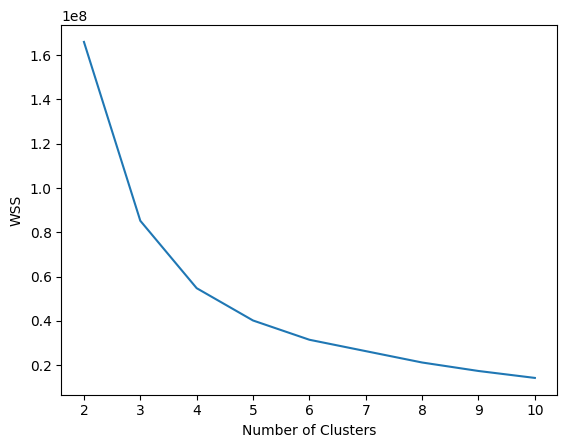

In [234]:

df = df_dict[('week', 'spring')]
df = df.set_index('substation')
scores_pca = get_scores_pca(df, 2)
range_of_k_vals = range(2, 11)
elbow_scores = []
pca_cluster_results = df.copy()
for n_clusters in range_of_k_vals:
    # Get clustering results
    these_results,kmeans_pca = cluster_on_pca_scores(df, scores_pca, n_clusters)
    # Add results to dataframe
    pca_cluster_results[f'PCA_clustering_k={n_clusters}'] = np.array(these_results['Segment K-means PCA'])

    # Calculate and store elbow score
    elbow_scores.append(kmeans_pca.inertia_)
    
# Plot elbow curve
plt.plot(range(2,11), elbow_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.show()

In [235]:
k = 3
n_components = 2
df = df_dict[('week', 'summer')]
df = df.set_index('substation')

pca = PCA(n_components = n_components)
#Fit the model the our data with the selected number of components. In our case three.
pca.fit(df)

pca.transform(df)
scores_pca = pca.transform(df)

# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
# We fit our data with the k-means pa model
kmeans_pca.fit(scores_pca)
# We create a new data frame with the original features and add the PC scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = False), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-n_components: ] = ['Component 1','Component 2']
# The last column we add contains the pea k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans['clusters'] = np.array(df_segm_pca_kmeans['Segment K-means PCA'])

# Find cluster representatives

results = {}


# Loop over each cluster
for cluster in range(k):
    # Get the subset of the dataframe that belongs to the current cluster
    cluster_subset = df_segm_pca_kmeans[df_segm_pca_kmeans['Segment K-means PCA'] == cluster]
    # Get the centroid of the current cluster in the PCA space
    centroid_pca = kmeans_pca.cluster_centers_[cluster]
    

    # Calculate the distance between each substation and the centroid of the current cluster
    distances = np.linalg.norm(cluster_subset[['Component 1', 'Component 2']].values - centroid_pca, axis=1)
    
    # Find the index of the substation closest to the centroid of the current cluster
    closest_substation_index = np.argmin(distances)
    # Get the name of the substation closest to the centroid of the current cluster
    closest_substation_name = cluster_subset.iloc[closest_substation_index]['substation']
    # Add the substation name to the results dictionary
    results[cluster] = closest_substation_name


print(df_segm_pca_kmeans['clusters'].value_counts())

0    55
1    25
2     2
Name: clusters, dtype: int64


0 Sherwood close 
1 church road fieldside
2 medawar centre 


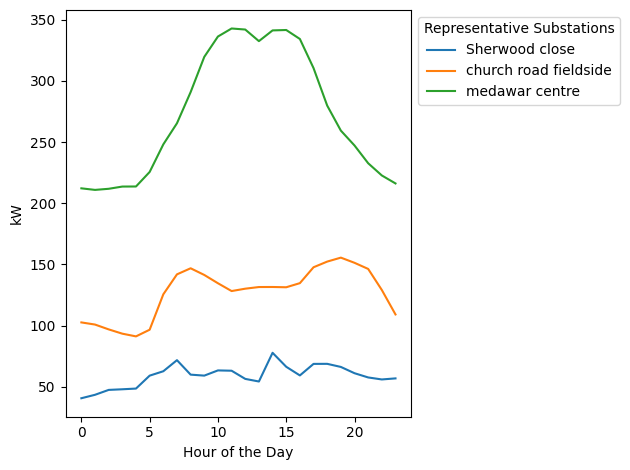

0 Sherwood close 
1 church road fieldside
2 medawar centre 


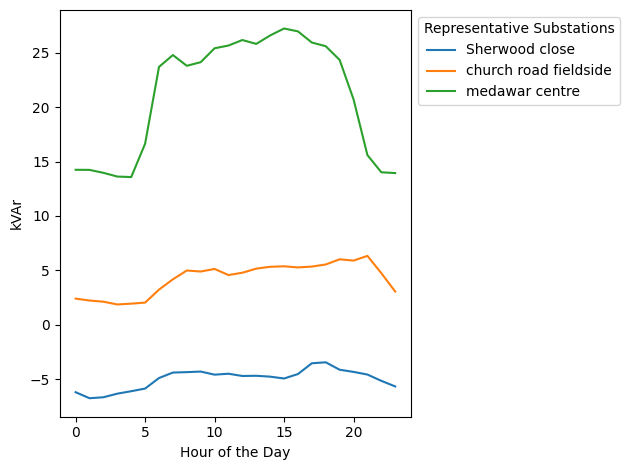

In [236]:
import matplotlib as mpl
plt.style.use('default')

# Create figure with white background
fig = plt.figure(facecolor='white')
# Plot all active power profiles
for cluster_number, substation in enumerate(list(results.values())):
    print(cluster_number, substation)
    dataframes[substation]['Hour'] = dataframes[substation].Datetime.dt.hour
    plt.plot(dataframes[substation].groupby('Hour').agg('Active Power [kW]').median(), label=substation)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title = 'Representative Substations')
plt.xlabel('Hour of the Day')
plt.ylabel('kW')
    
# Save figure
plt.tight_layout()

plt.savefig('figures/report/PCA_clustering_ss_rep_profiles_ap.png')
plt.show()


# Plot all reactive power profiles
for cluster_number, substation in enumerate(list(results.values())):
    print(cluster_number, substation)
    dataframes[substation]['Hour'] = dataframes[substation].Datetime.dt.hour
    plt.plot(dataframes[substation].groupby('Hour').agg('Reactive Power [kVAr]').median(), label=substation)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title = 'Representative Substations')
plt.xlabel('Hour of the Day')
plt.ylabel('kVAr')

# Save figure
plt.tight_layout()
plt.savefig('figures/report/PCA_clustering_ss_rep_profiles_rp.png')
plt.show()

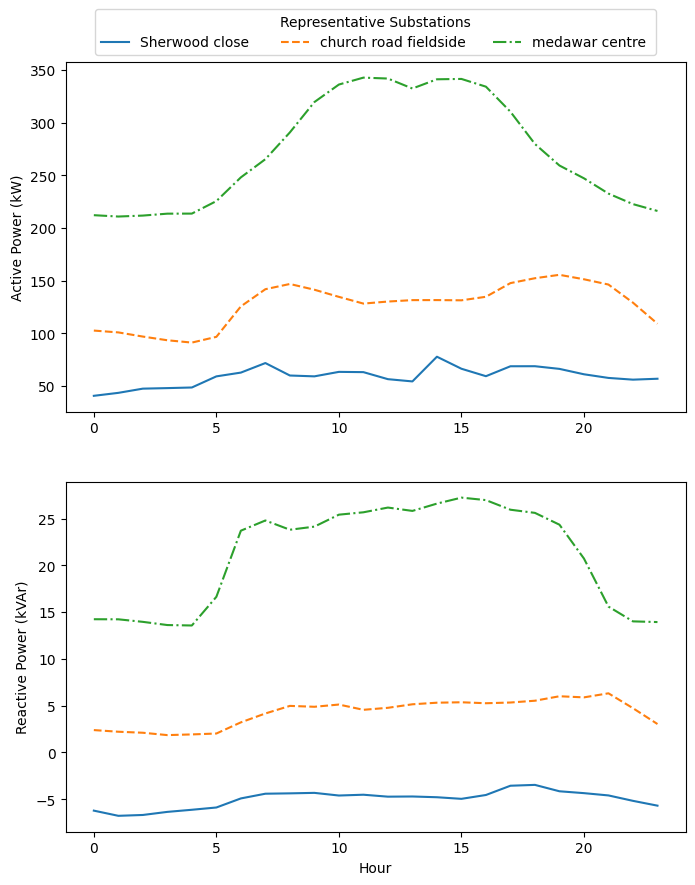

In [262]:
# Create figure with white background
fig = plt.figure(figsize = (8,10))

# Create subplot with 1 row and 2 columns
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
linestyles = ['-', '--', '-.']
# Plot all active power profiles in the first subplot
for cluster_number, substation in enumerate(list(results.values())):
    dataframes[substation]['Hour'] = dataframes[substation].Datetime.dt.hour
    ax1.plot(dataframes[substation].groupby('Hour').agg('Active Power [kW]').median(), label=substation, linestyle = linestyles[cluster_number])

# Plot all reactive power profiles in the second subplot
for cluster_number, substation in enumerate(list(results.values())):
    dataframes[substation]['Hour'] = dataframes[substation].Datetime.dt.hour
    ax2.plot(dataframes[substation].groupby('Hour').agg('Reactive Power [kVAr]').median(), label=substation,linestyle = linestyles[cluster_number])

# Set labels and legend for both subplots
#ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Active Power (kW)')
#ax1.set_title('Active Power Profiles')
ax1.legend(loc='upper center', title='Representative Substations', bbox_to_anchor = (0.5, 1.17), ncol=3)

ax2.set_xlabel('Hour')
ax2.set_ylabel('Reactive Power (kVAr)')
#ax2.set_title('Reactive Power Profiles')
#ax2.legend(loc='upper left', bbox_to_anchor=(1,1), title='Representative Substations')

# Save and show figure
#plt.tight_layout()
plt.savefig('figures/report/PCA_clustering_ss_rep_profiles.png', bbox_inches = "tight")
plt.show()


## <font color ='lightgreen'> K Means Clustering (w/o PCA) </font> <br>

### For report

Index(['substation', 'Mean total daily load consumption Active Power [kW]',
       'Mean value of daily load pattern Active Power [kW]',
       'Max power consumption during a day Active Power [kW]',
       'Number of hours above 1.25 * mean val Active Power [kW]',
       'Number of hours below 0.75 * mean val Active Power [kW]'],
      dtype='object')


/Users/Orie4416/Desktop/Energy Systems RAship/LEO/leo_substation_analysis/substation_analysis_functions.py:700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'cluster_{k}'] = kmeans.labels_
/Users/Orie4416/Desktop/Energy Systems RAship/LEO/leo_substation_analysis/substation_analysis_functions.py:700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'cluster_{k}'] = kmeans.labels_
/Users/Orie4416/Desktop/Energy Systems RAship/LEO/leo_substation_analysis/substation_analysis_functions.py:700: SettingWithC

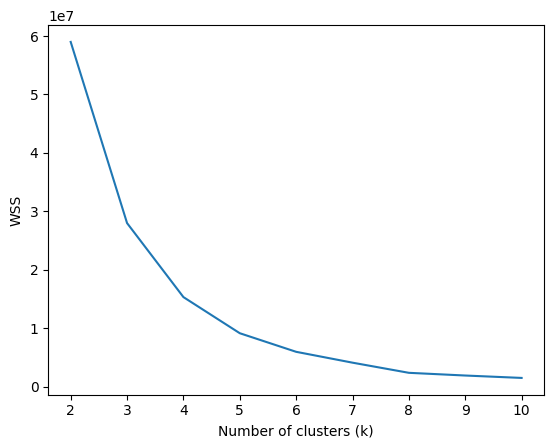

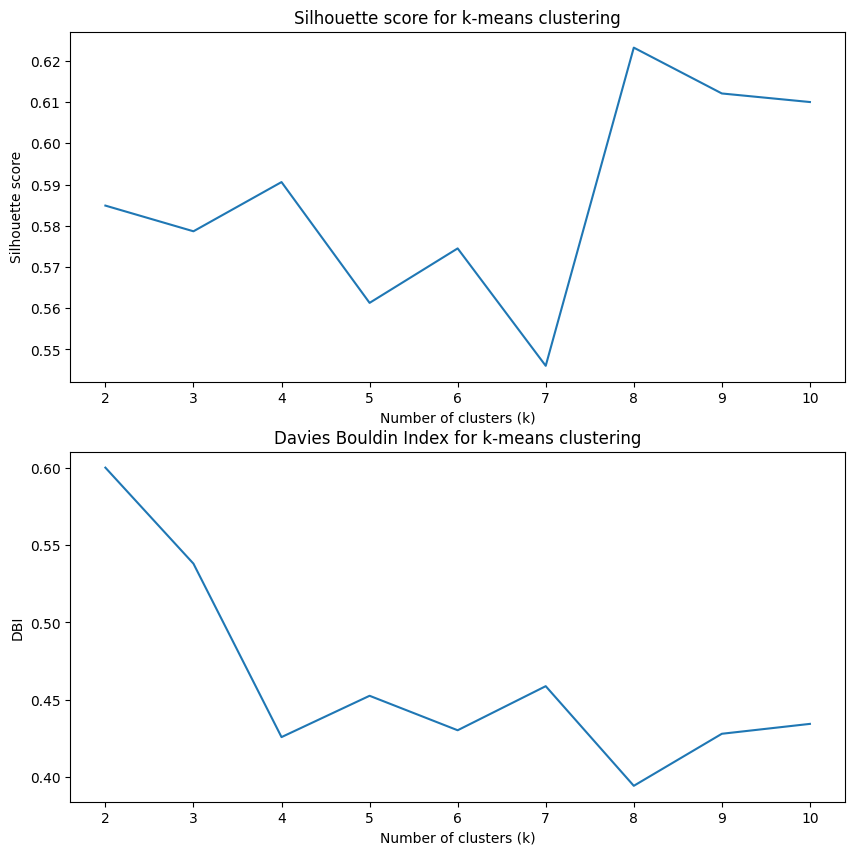

In [268]:
reload(substation_analysis_functions)
feature_of_interest = 'Active Power [kW]'
features = [ 
            'substation',
                 f'Mean total daily load consumption {feature_of_interest}',
                 f'Mean value of daily load pattern {feature_of_interest}',
                f'Max power consumption during a day {feature_of_interest}',
                 f'Number of hours above 1.25 * mean val {feature_of_interest}',
                 f'Number of hours below 0.75 * mean val {feature_of_interest}'
    ]

kmeans_df = df_dict[('week', 'spring')]
# Get subset of kmeans_df where columns are the columns in 'features' list
subset = kmeans_df[features]
df, results = substation_analysis_functions.k_means(subset, active_only=  True)


In [269]:
k = 3

# Get the feature set - only active power features
X = subset.loc[:, subset.columns.str.contains('Active Power')].values

# Create an empty list to hold the silhouette scores and DBI and elbow cost
wss = []

# Create empty dict to hold results
results = {}

# Fit the k-means model to the feature set
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

subset['cluster'] = labels

# Loop through each cluster
for cluster in range(k):
    # Find the indices of the subset dataframe that belong to the current cluster
    indices = np.where(labels == cluster)[0]
    
    # Get the subset of the dataframe that belongs to the current cluster
    cluster_subset = subset.iloc[indices]
    
    # Find the centroid of the current cluster
    centroid = kmeans.cluster_centers_[cluster]
    
    # Calculate the distance between each substation and the centroid of the current cluster
    distances = np.linalg.norm(cluster_subset.loc[:, cluster_subset.columns.str.contains('Active Power')].values - centroid, axis=1)
    
    # Find the index of the substation closest to the centroid of the current cluster
    closest_substation_index = np.argmin(distances)
    
    # Get the name of the substation closest to the centroid of the current cluster
    closest_substation = cluster_subset.iloc[closest_substation_index]['substation']
    
    # Add the substation closest to the centroid of the current cluster to the results dictionary
    results[cluster] = closest_substation
    
print(subset['cluster'].value_counts())

print(round(subset.groupby('cluster').mean(),2).to_latex())

0    44
1    32
2     7
Name: cluster, dtype: int64
\begin{tabular}{lrrrrrrrrrrrrrr}
\toprule
{} &  Mean total daily load consumption Active Power [kW] &  Mean value of daily load pattern Active Power [kW] &  Max power consumption during a day Active Power [kW] &  Number of hours above 1.25 * mean val Active Power [kW] &  Number of hours below 0.75 * mean val Active Power [kW] &  cluster\_2 &  cluster\_3 &  cluster\_4 &  cluster\_5 &  cluster\_6 &  cluster\_7 &  cluster\_8 &  cluster\_9 &  cluster\_10 \\
cluster &                                                      &                                                     &                                                       &                                                          &                                                          &            &            &            &            &            &            &            &            &             \\
\midrule
0       &                                            1028.00 &       

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_25097/359593089.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['cluster'] = labels


In [232]:
list(results.values())

['hopcraft lane', 'Barry Avenue', 'medawar centre ']

1 regal industrial
2 henry road T1
3 bicester village service station


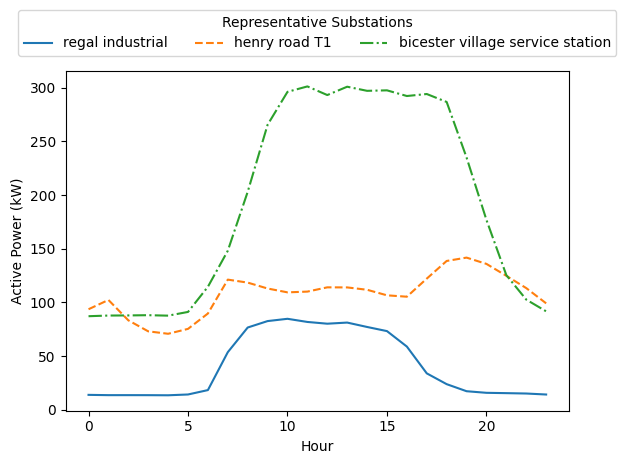

In [271]:

plt.style.use('default')
# Plot all active power profiles
for cluster_number, substation in enumerate(list(results.values())):
    print(cluster_number + 1, substation)
    dataframes[substation]['Hour'] = dataframes[substation].Datetime.dt.hour
    plt.plot(dataframes[substation].groupby('Hour').agg('Active Power [kW]').median(), label=substation, linestyle = linestyles[cluster_number])
    #plt.set_title(f'Active Power Load Profiles for all Substations in {key[0]}, {key[1]}')
    plt.legend(title = 'Representative Substations',loc = 'upper center', ncol = 3, bbox_to_anchor = (0.5, 1.2))
    plt.xlabel('Hour')
    plt.ylabel('Active Power (kW)')

plt.tight_layout()
plt.savefig('figures/report/clustering_without_dim_red_ss_profiles.png', bbox_inches='tight')
plt.show()

week spring


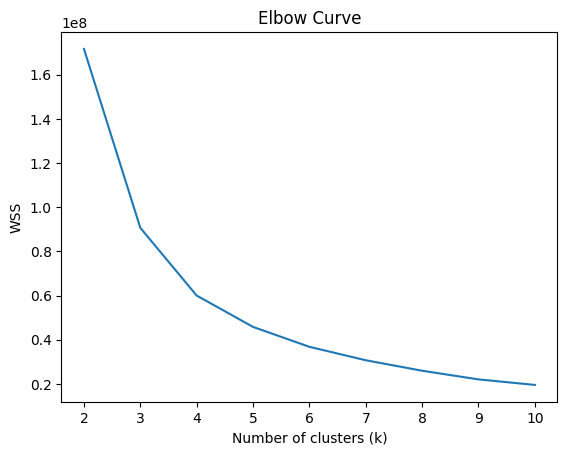

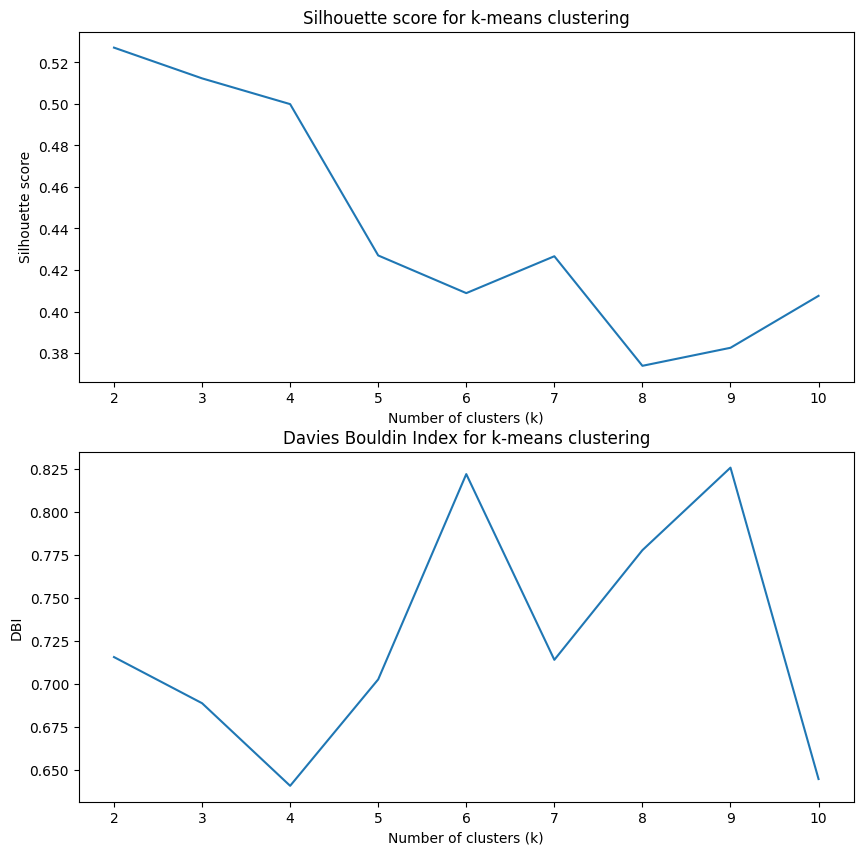

weekend spring


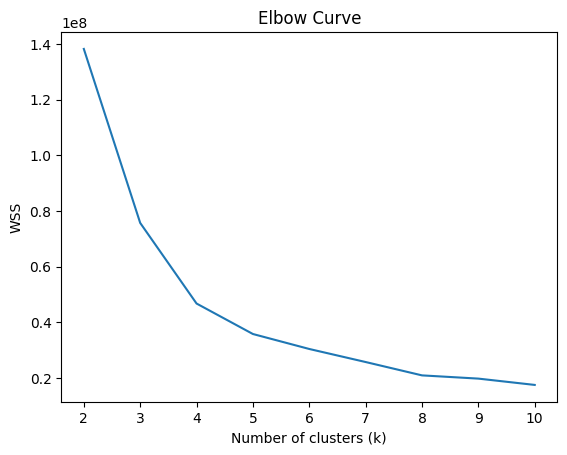

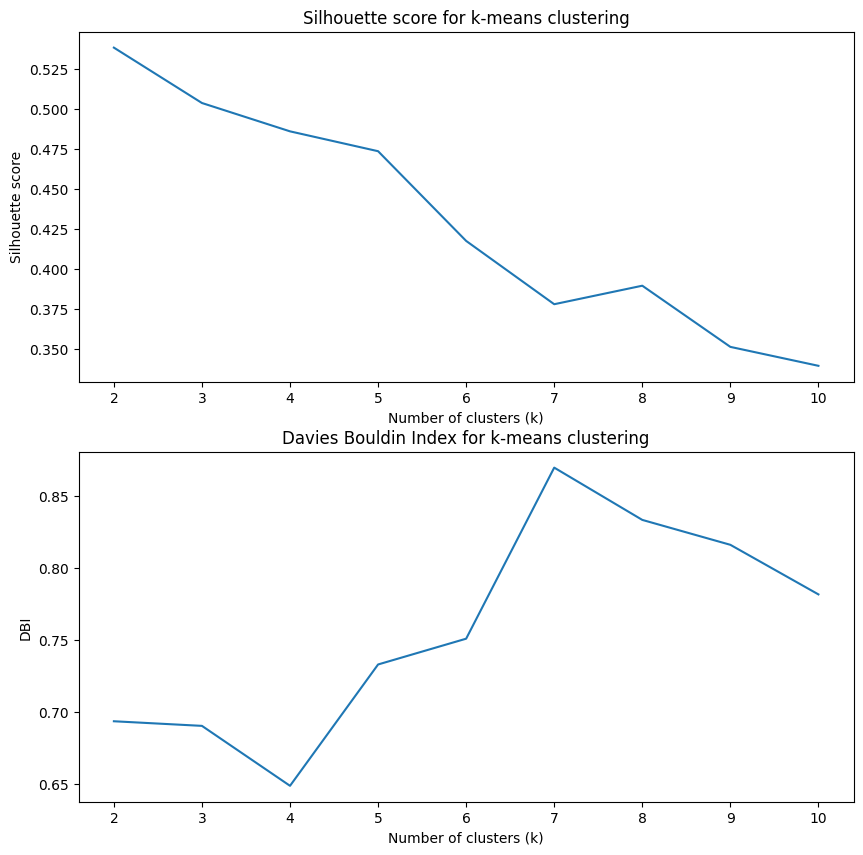

week summer


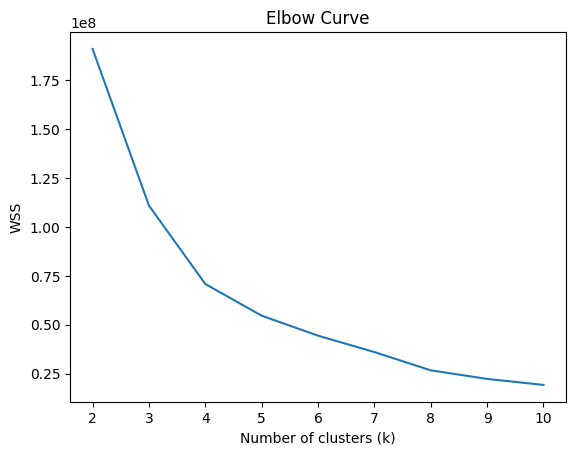

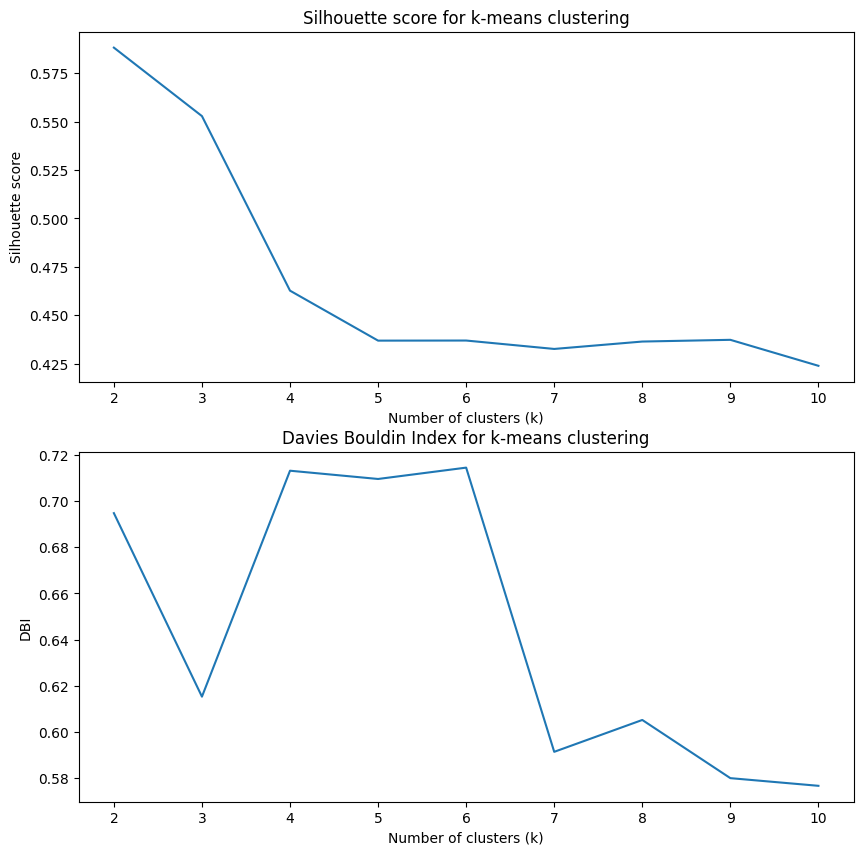

weekend summer


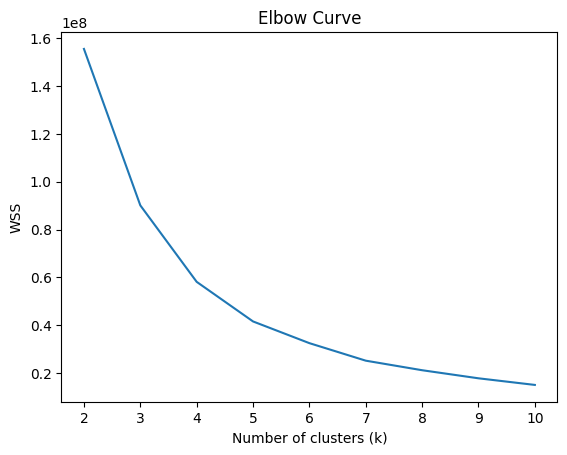

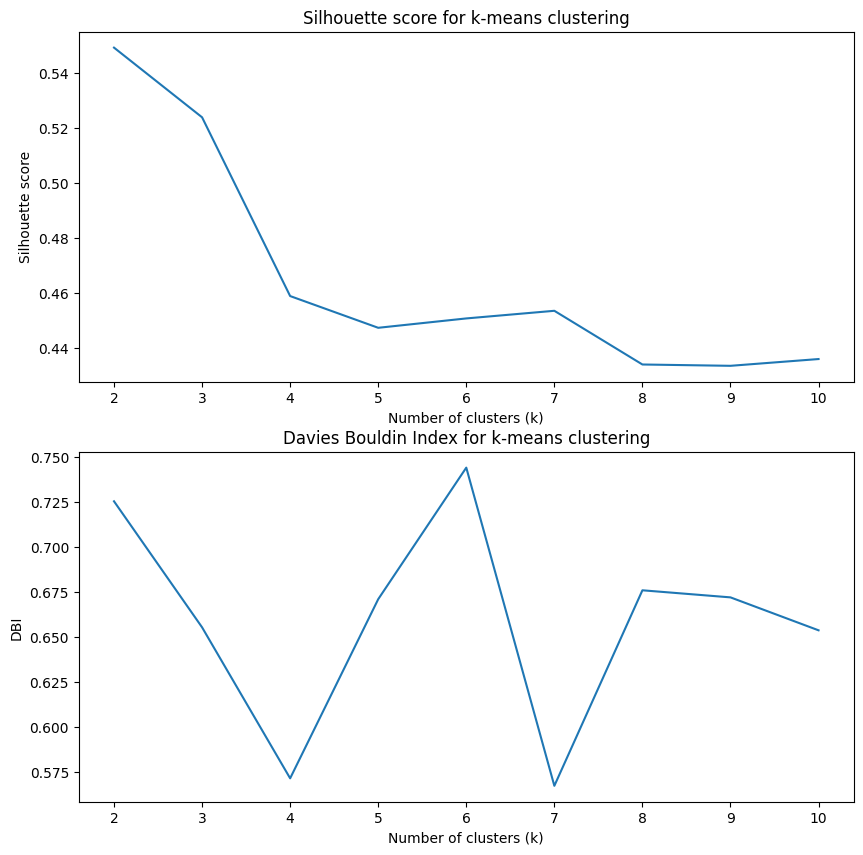

week fall


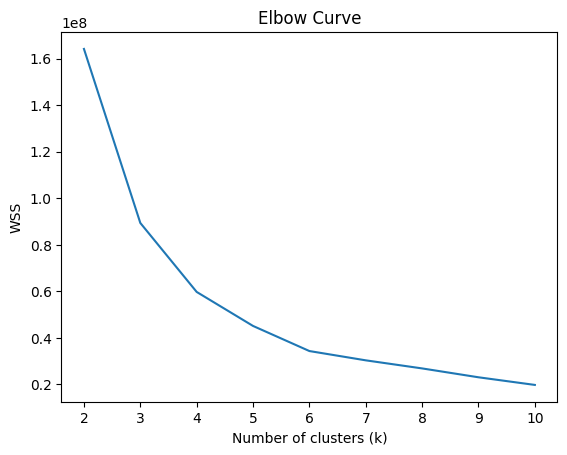

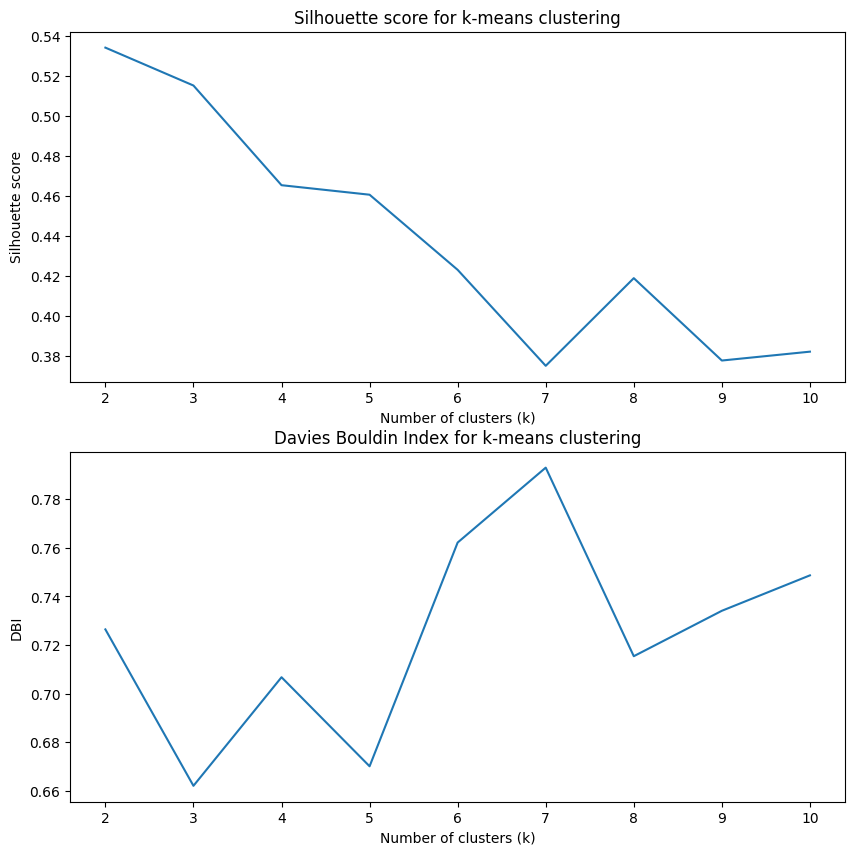

week winter


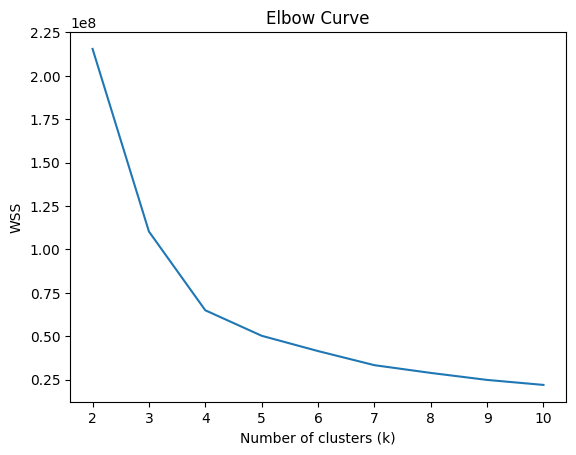

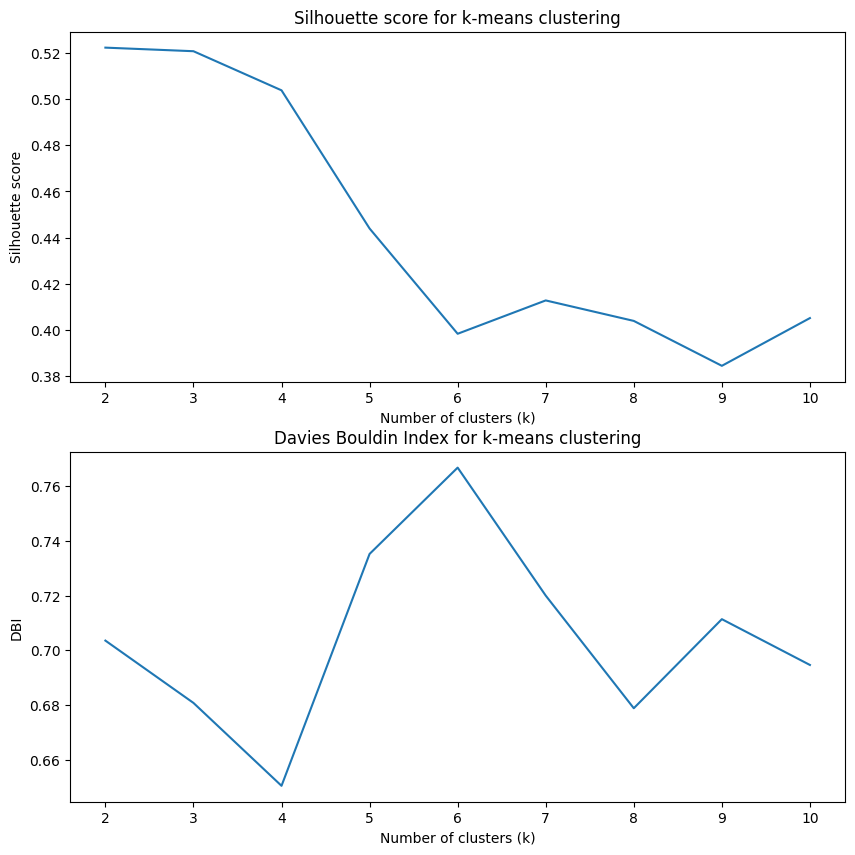

weekend winter


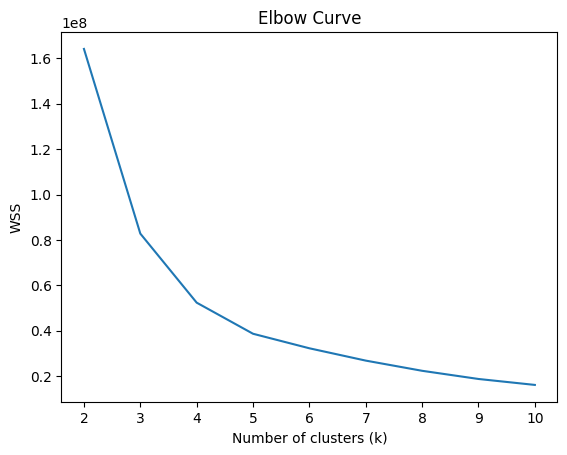

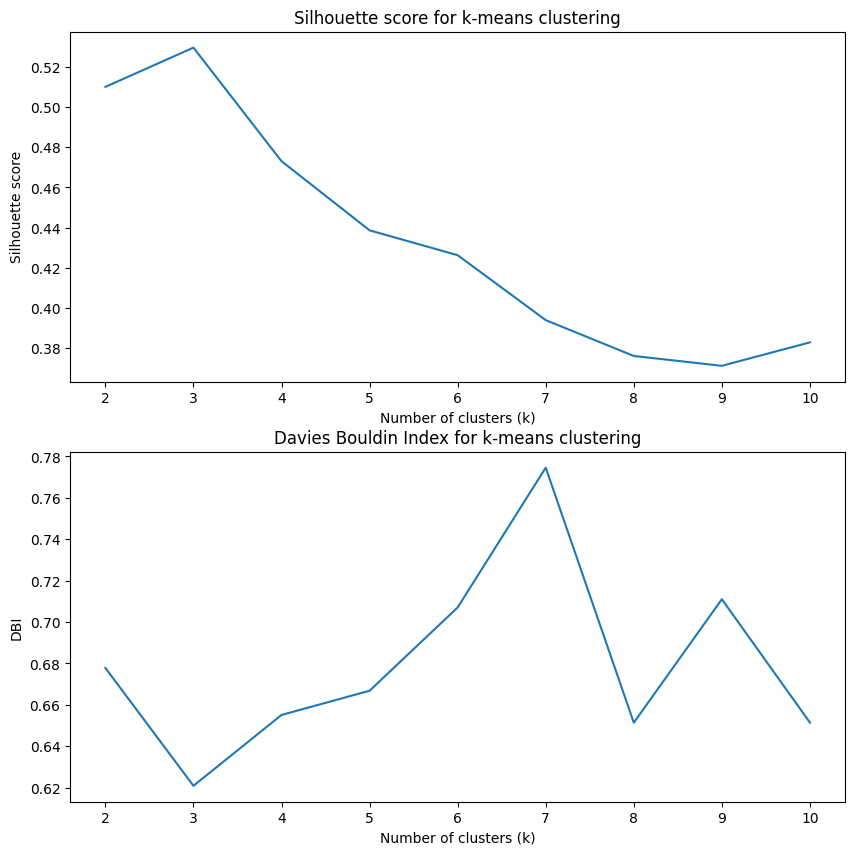

weekend fall


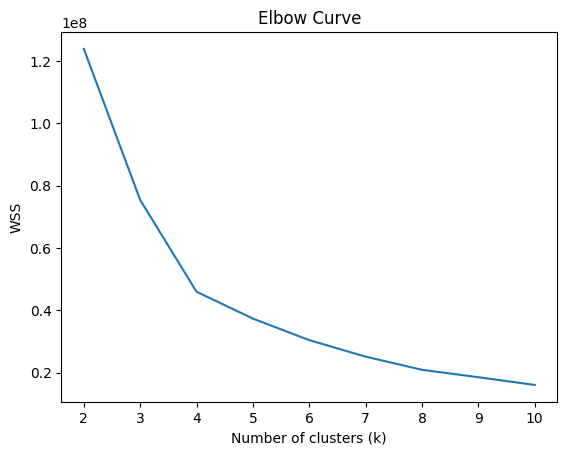

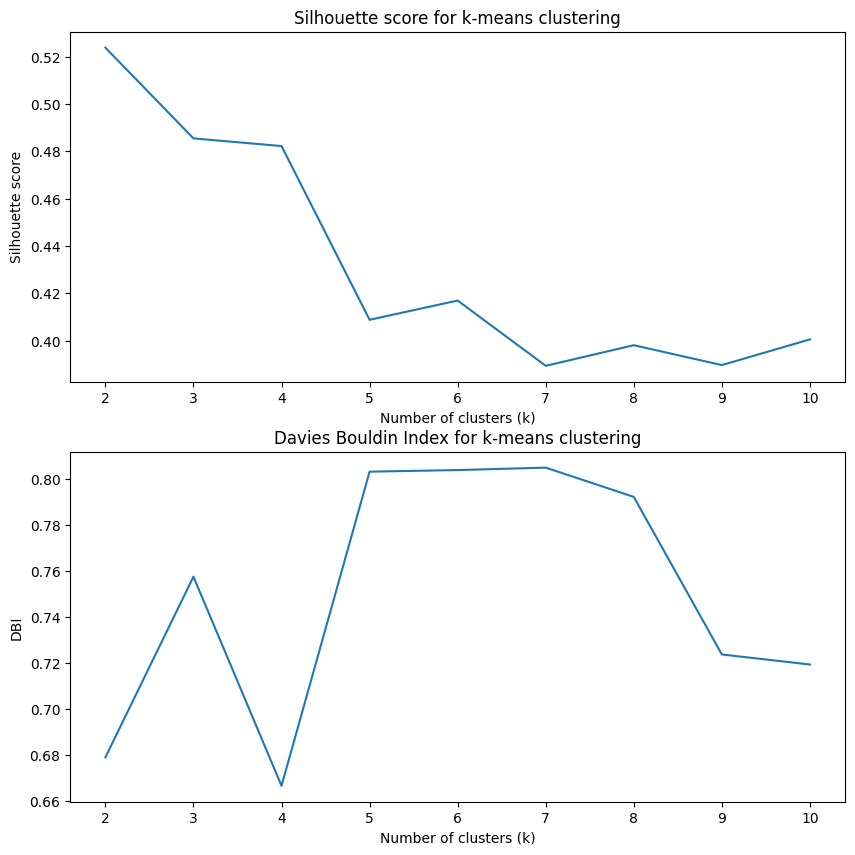

In [23]:
kmeans_dict = df_dict.copy()
kmeans_results = {}
kmeans_cluster_centers = {}
for feature_set in [False]:
    count = 0
    kmeans_results[feature_set] = {}
    kmeans_cluster_centers[feature_set] = {}
    for k,v in kmeans_dict:
        print(k,v)
        kmeans_dict[k,v], kmeans_results[feature_set][k,v] = substation_analysis_functions.k_means(df_dict[k,v], active_only = feature_set)
        
        # Write to csv
for k,v in kmeans_dict:
    to_write = kmeans_dict[k,v].loc[:, kmeans_dict[k,v].columns.str.contains('cluster|substation')]
    to_write.to_csv(f'../cluster_assignments/' + str(k) + '_' + str(v) + '_kmeans_cluster.csv')


### <font color = 'lightgreen'> Get list of the cluster centers for the optimal k for a particular time/week combo <font>

<font color ='lightgreen'> Get feature statistics for each cluster, i.e. get the mean value of each feature statistic for each cluster </font>

In [ ]:
# Create a dictionary to hold the relevant values of the features for each cluster for each season/time of week combo
df_stats_numeric = {}
df_stats_string = {}

# Choose k to work with 
k = 4

# Loop through df_dict 
for key in df_dict:
        
    # Group by chosen cluster number
    df_grouped = df_dict[key].groupby(f'cluster_{k}')
    
    # Calculate the mean of each feature for each cluster for all columns that have Active Power and Reactive Power in them
    df_mean = df_grouped.agg('mean')
    
    df_mode = df_grouped.agg(pd.Series.mode)
    
    # Save stats to dictionary
    df_stats_numeric[key] = df_mean
    df_stats_string[key] = df_mode
    
    # Write to csv (first filtering out the unwated columns)
    df_mean_to_write = round(df_mean.loc[:,~df_mean.columns.str.contains('cluster')],2)
    # df_mean_to_write.to_csv(f'../example_feature_sets/cluster_{k}_GF_vals_{key[0]}_{key[1]}.csv')
    
    df_mode_to_write = round(df_mode.loc[:,~df_mode.columns.str.contains('cluster')],2)
    df_mode_to_write = df_mode_to_write.loc[:,~df_mode_to_write.columns.str.contains('substation')] 
    df_mode_to_write = df_mode_to_write.loc[:,~df_mode_to_write.columns.str.contains('Percent')] 
    # df_mode_to_write.to_csv(f'../example_feature_sets/cluster_{k}_PF_vals_{key[0]}_{key[1]}.csv')
    print(df_mode_to_write.columns)
    
    df_to_write = df_mean_to_write.merge(df_mode_to_write, on = f'cluster_{k}', how = 'left')
    df_to_write.to_csv(f'../example_feature_sets/cluster_{k}_feature_vals_{key[0]}_{key[1]}.csv')
    





<font color = 'lightgreen'> Get the median load profiles (or example load profile) for the representative substations with error bars <font>

['croft avenue 1', 'juxon st flats', 'units 1314 Oxford science pk']
['Hillsborough Close', 'Swan mews', 'Nowell road']
['heyford hill Lane', 'blackwells hythe bridge st', 'medawar centre ']
['springfield road', 'units 1314 Oxford science pk', 'ashmolean museum ']
['Earls lane deddington', 'Bridge View Watlington Road', 'The Grove Deddington']
['osney bridge street', 'Springfield Road', 'Swan mews']
['kingfisher way ss', 'St John Way Hempton', 'Drake Avenue']
['southern by pass', 'Osney local', 'Drake Avenue']
0 croft avenue 1
1 juxon st flats
2 units 1314 Oxford science pk
0 croft avenue 1
1 juxon st flats
2 units 1314 Oxford science pk


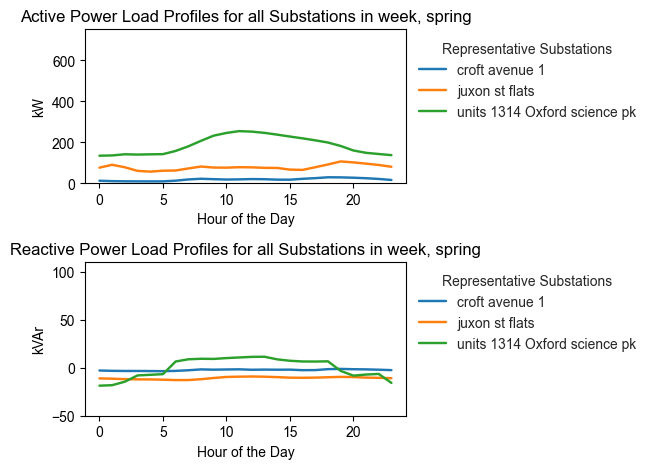

0 Hillsborough Close
1 Swan mews
2 Nowell road
0 Hillsborough Close
1 Swan mews
2 Nowell road


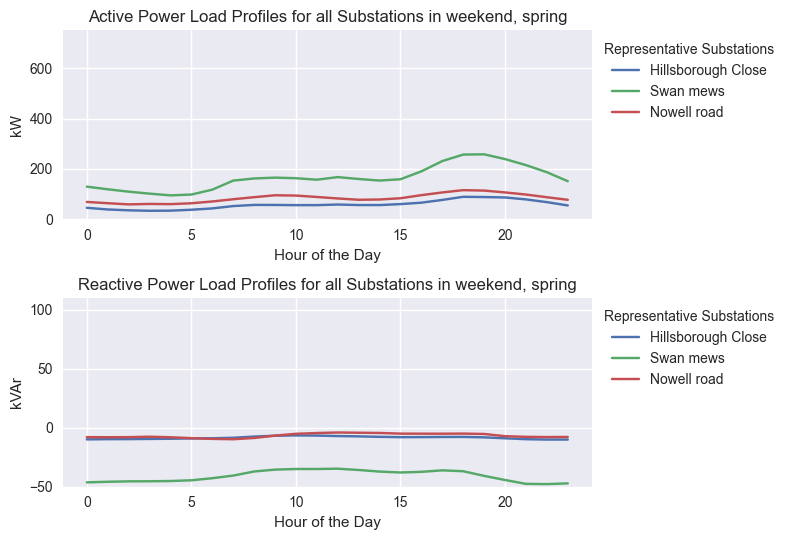

0 heyford hill Lane
1 blackwells hythe bridge st
2 medawar centre 
0 heyford hill Lane
1 blackwells hythe bridge st
2 medawar centre 


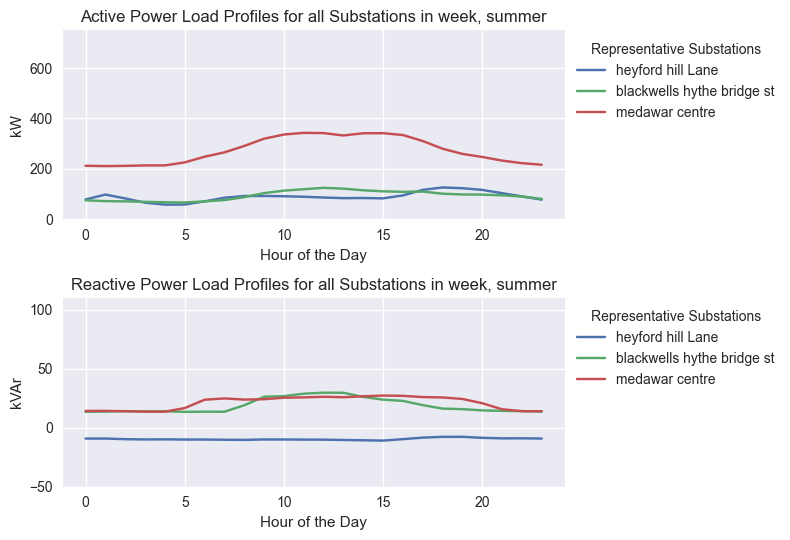

0 springfield road
1 units 1314 Oxford science pk
2 ashmolean museum 
0 springfield road
1 units 1314 Oxford science pk
2 ashmolean museum 


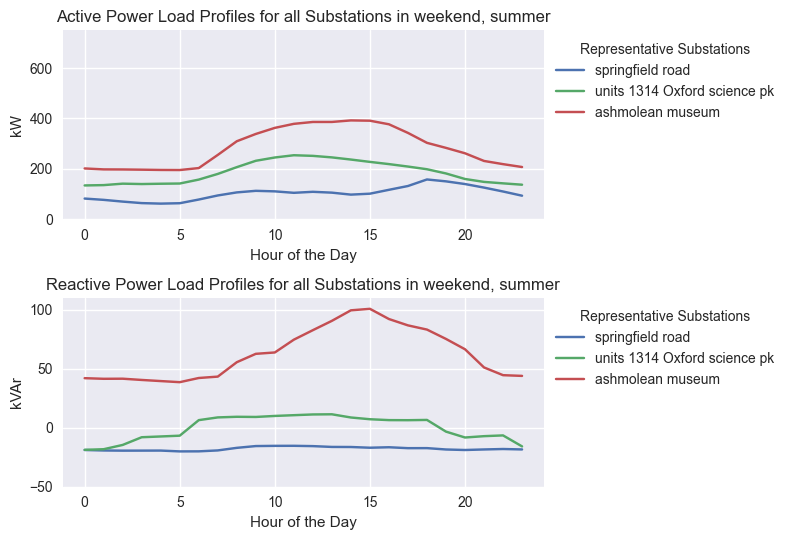

0 Earls lane deddington
1 Bridge View Watlington Road
2 The Grove Deddington
0 Earls lane deddington
1 Bridge View Watlington Road
2 The Grove Deddington


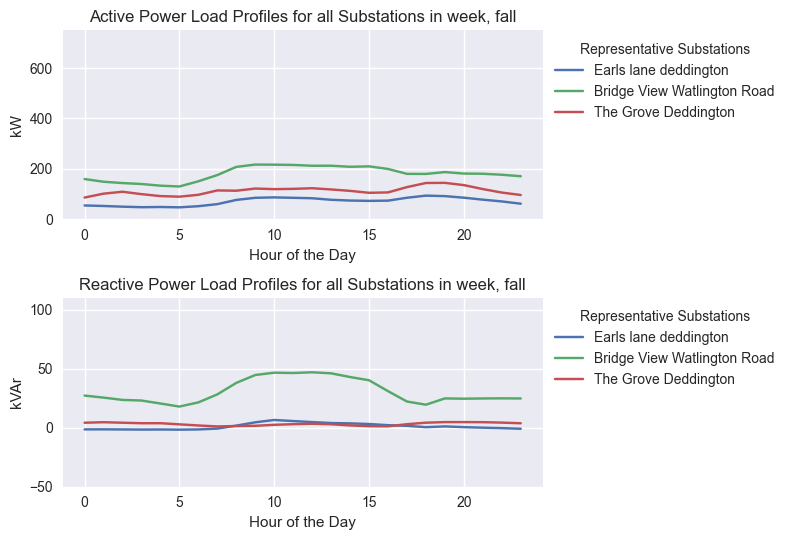

0 osney bridge street
1 Springfield Road
2 Swan mews
0 osney bridge street
1 Springfield Road
2 Swan mews


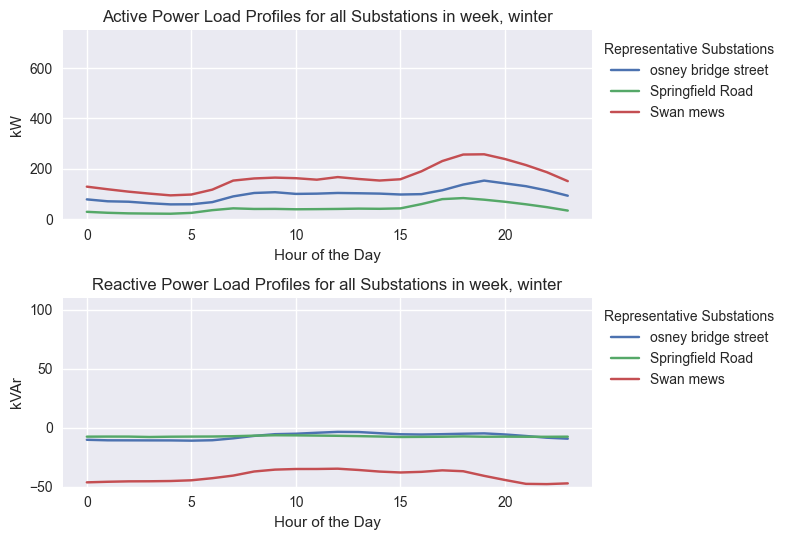

0 kingfisher way ss
1 St John Way Hempton
2 Drake Avenue
0 kingfisher way ss
1 St John Way Hempton
2 Drake Avenue


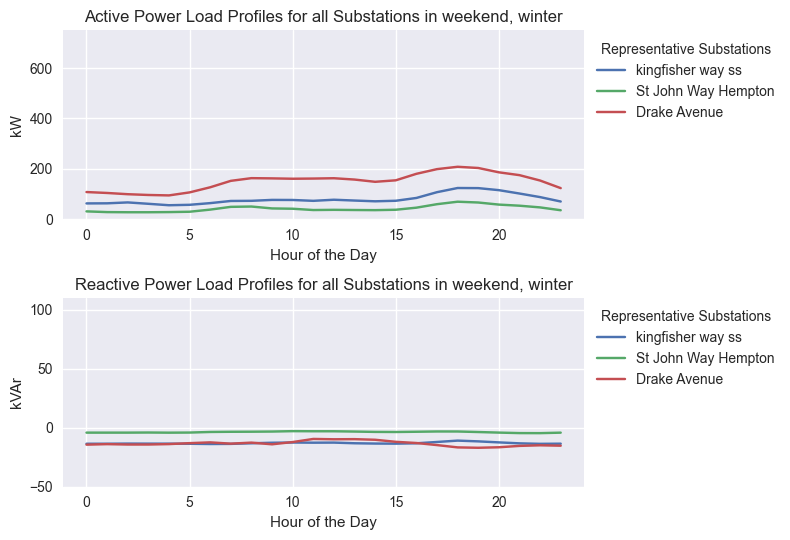

0 southern by pass
1 Osney local
2 Drake Avenue
0 southern by pass
1 Osney local
2 Drake Avenue


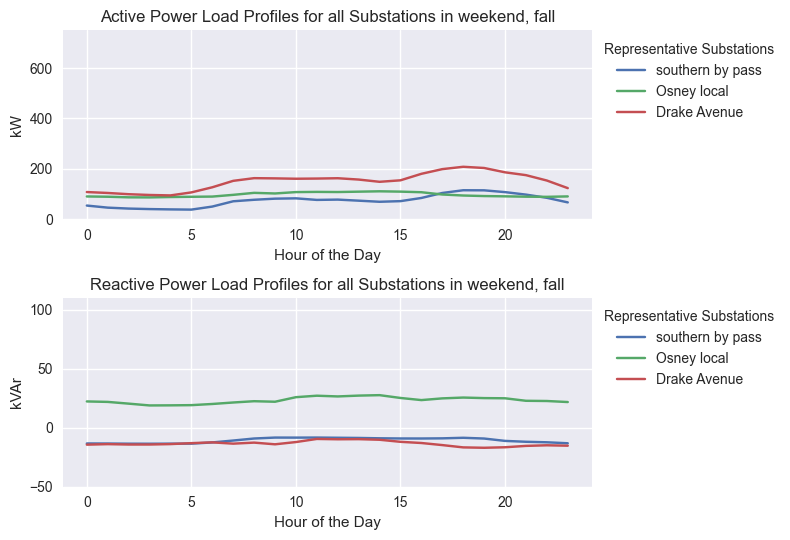

In [36]:
# Go thru all the season and time of week dataset combos
# In each one, Filter the dataset down to each cluster one at a time (range(1,num_clust+1))
# Pick a random substation from each cluster
k =3 
num_clust = k

# Initialize dictionary to hold the filtered dataframes
representative_substations = {}

for k,v in df_dict: 
    representative_substations[k,v] = {}
    cluster_reps = []
    for cluster in range(0,num_clust):
        # Filter down to the cluster
        df = df_dict[k,v].loc[df_dict[k,v][f'cluster_{num_clust}'] == cluster]
        # Pick a random substation
        substation = df.sample(1)['substation'].values[0]
        # Filter down to the substation
        #this_cluster_rep = df.loc[df['substation'] == substation]
        # Append to the list of cluster reps (appends in order of cluster number)
        cluster_reps.append(substation)
    print(cluster_reps)
    
    
    
        # Save the df to a dictionary
    representative_substations[k,v] = cluster_reps
        # Save the df to a csv
      #  df.to_csv(f'example_feature_sets/cluster_{num_clust}_substation_{substation}_{k}_{v}.csv')
for key in representative_substations:
    cluster_reps = representative_substations[key]
    fig, (ax1, ax2) = plt.subplots(2, 1)
    plt.style.use('seaborn')
    # Plot all active power profiles
    for cluster_number, substation in enumerate(cluster_reps):
        print(cluster_number, substation)
        dataframes[substation]['Hour'] = dataframes[substation].Datetime.dt.hour
        ax1.plot(dataframes[substation].groupby('Hour').agg('Active Power [kW]').median(), label=substation)
        ax1.set_title(f'Active Power Load Profiles for all Substations in {key[0]}, {key[1]}')
        ax1.legend(loc='upper left', bbox_to_anchor=(1,1), title = 'Representative Substations')
        ax1.set_xlabel('Hour of the Day')
        ax1.set_ylabel('kW')
        ax1.set_ylim(0, 750)

    # Plot all reactive power profiles
    for cluster_number, substation in enumerate(cluster_reps):
        print(cluster_number, substation)
        dataframes[substation]['Hour'] = dataframes[substation].Datetime.dt.hour
        ax2.plot(dataframes[substation].groupby('Hour').agg('Reactive Power [kVAr]').median(), label=substation)
        ax2.set_title(f'Reactive Power Load Profiles for all Substations in {key[0]}, {key[1]}')
        ax2.legend(loc='upper left', bbox_to_anchor=(1,1), title = 'Representative Substations')
        ax2.set_xlabel('Hour of the Day')
        ax2.set_ylabel('kVAr')
        ax2.set_ylim(-50,110)
    
    # Save figure
    os.makedirs(f'../example_load_profiles/{key[0]}_{key[1]}', exist_ok = True)
    plt.tight_layout()
    plt.style.use('seaborn')
    plt.savefig(f'../example_load_profiles/{key[0]}_{key[1]}/all_ss_load_profiles.png', facecolor = 'white', edgecolor = 'black')
    plt.show()


## <font color='white'> Results </font>

In [ ]:
for k,v in results[True]:
    cluster_assignments = results[True][k,v]
    df = pd.DataFrame(cluster_assignments)
    df.to_csv(f'cluster_assignments/{k}_{v}.csv')
#     for num_clust, labels in cluster_assignments.items():
#         # Create dataframe where each column has the cluster assignments for each k value 
#         df[f'cluster_{num_clust}'] = labels
        
#         df = pd.DataFrame(labels, columns = ['labels']).sort_values(by ='labels')


# df.to_csv(f'cluster_assignments/{k}_{v}_numclust=_{num_clust}.csv')
#        # cluster_assignments.sort_values(by=['cluster_6']).to_csv(f'cluster_assignments/{k}_{v}.csv')
    

In [ ]:
#k = 5
for k,v in df_dict:
    print(k,v)
  #  df_dict[k,v][]
    cluster_assignments = df_dict[k,v][['substation', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9', 'cluster_10']]
   # print(np.array(cluster_assignments.sort_values(by=['cluster_6'])))
  #  cluster_assignments.sort_values(by=['cluster_6']).to_csv(f'cluster_assignments/{k}_{v}.csv')
    cluster_assignments.to_csv(f'cluster_assignments/{k}_{v}.csv')
    
    


# <font color='orange'> To-Do: </font>
0. Organize Jupyter notebook file-- put all the pre-processing in one cell <br> 
0b. Include MIN active power hour in the peak hour features   <font color = 'lightgreen'> done </font><br>
0c. Redefine and drop outlier observations <font color = 'lightgreen'> done </font><br>
1. Extract small set of features given by Elnaz <font color = 'lightgreen'> done </font><br>
2. Clustering on small set of features given by Elnaz <font color = 'lightgreen'> done </font><br>
3. Implement threshold min distance for substation assignment  <font color = 'lightgreen'> done </font><br>
4. Plot PCA clustering results on map and send to Elnaz/Scot  <font color = 'orange'> not needed yet </font><br>
5. Repeat step 4 with the KMeans-only clustering on the small set of features given by Elnaz <font color = 'lightgreen'> done </font><br>
6. Compare PCA clustering results with the Land Use statistics <font color = 'lightgreen'> done </font><br>
7. Compare K Means clustering results with the Land Use statistics <font color = 'lightgreen'> done </font><br>
8. Make a list of the decision parameters within the methodology, and a list of possible outcomes to frame discussion with elnaz <font color = 'orange'> IN PROGRESS BELOW <font>


idea: dbscan clustering with land use types, and then assign substations, and then check power profiles?

Decision parameters: <br>
1. Data cleaning - active and reactive power thresholds; splitting the dataset up into season/time-of-week combinations; threshold data requirement for dropping substations from the season/time-of-week subsets (these fall under the category of having enough clean data to determine clusters)
2. Feature extraction - which features do we extract; <font color = 'orange'> try using IFEEL? </font>
3. Clustering: PCA n-components; 

Outcomes: <br>
1. Use cluster labels to predict what distribution of consumers the substation serves
2. Compare 'goodness-of-clustering' index between PCA and K-means results (not super interesting)
3. 

# <font color = 'orange'> Plot results on map <font>

Read in substation location data

In [ ]:
substations = pd.read_csv('../substation_descriptive_data.csv')
substations['substation'] = substations['Substation Site']
substations = substations[['substation', 'Latitude', 'Longitude']]
substations.set_index('substation', inplace= True)
substations['Longitude'] = substations['Longitude'] * -1
substations


Join substation location data with substation clustering results

In [ ]:
saved_results = {}
for k,v in pca_cluster_results:
    df= pca_cluster_results[k,v]
    df.index = df.index.str.lower().str.strip() # so that the dataframe indeces match up with the substations dataframe
    substations.index = substations.index.str.lower().str.strip()
    saved_results[k,v] = df.join(substations)


### Folium plot

In [ ]:
df = df[df['Latitude'].isna() == False]
df['Longitude'] = -1 * df['Longitude']
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=4)
for index, row in df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], 
                  popup=f"{index}, Cluster: {row['Cluster']}",
                  icon=folium.Icon(color='red' if row['Cluster'] == 1 else 'blue' if row['Cluster'] == 2 else 'green')
                 ).add_to(m)

m.save('../maps/pca_clusters_k=5_week_summer.html')
m

### Shapefile based plot

In [ ]:



# Set the directory where the shapefiles are stored
dir_path = '../OS OpenMap Local (ESRI Shape File) SU/data/'

# Create an empty GeoDataFrame to hold the merged data
merged_gdf = gpd.GeoDataFrame()
count = 0
# Loop through all files in the directory with the .shp extension
for filename in os.listdir(dir_path):
    if filename.endswith('.shp'):
        count +=1
        print(count)
        # Read in the shapefile as a GeoDataFrame
        gdf = gpd.read_file(os.path.join(dir_path, filename))
        
        # Append the GeoDataFrame to the merged data
        merged_gdf = merged_gdf.append(gdf, ignore_index=True)
        



        
dir_path = '../OS OpenMap Local (ESRI Shape File) SP/data/'
for filename in os.listdir(dir_path):
    if filename.endswith('.shp'):
        count +=1
        print(count)
        # Read in the shapefile as a GeoDataFrame
        gdf = gpd.read_file(os.path.join(dir_path, filename))
        
        # Append the GeoDataFrame to the merged data
        merged_gdf = merged_gdf.append(gdf, ignore_index=True)
        

# # Convert your data to a geodataframe
# geometry = gpd.points_from_xy(df.Longitude, df.Latitude)
# geo_df = gpd.GeoDataFrame(data, geometry=geometry)

# # Make sure the CRS matches
# geo_df.crs = map_df.crs

# # Plot the map and data
# fig, ax = plt.subplots(figsize=(10, 10))
# map_df.plot(ax=ax, alpha=0.4, color='grey')
# geo_df.plot(ax=ax, markersize=2, color='red', marker='o')
# plt.show()


In [ ]:
merged_gdf.plot()

# <font color ='lightgreen'> Combine Consumer Type Data with Substation Data <font>

In [ ]:
substations = pd.read_csv('../substation_descriptive_data.csv')
substations['substation'] = substations['Substation Site']
substations = substations[['substation', 'Latitude', 'Longitude']]
substations.set_index('substation', inplace= True)
substations['Longitude'] = substations['Longitude'] * -1
substations


In [ ]:
consumer_data = pd.read_csv('../Dancing_types.csv')
consumer_data['Land Uses'] = consumer_data['LANDUSEDES']
# Define the projection of the input coordinates (OSGB36)
input_proj = pyproj.Proj(init='epsg:27700')

# Define the projection of the output coordinates (WGS84)
output_proj = pyproj.Proj(init='epsg:4326')

# Transform the coordinates
consumer_data['Longitude'], consumer_data['Latitude'] = pyproj.transform(input_proj, output_proj, consumer_data['X'], consumer_data['Y'])
consumer_data = consumer_data[['Longitude', 'Latitude', 'Land Uses']]
consumer_data.head(5)


In [ ]:
consumer_data.value_counts('Land Uses')


Assign Consumers to Substations based on location



In [ ]:
reload(substation_analysis_functions)
result_df, df_count = substation_analysis_functions.find_nearest_substation(substations, consumer_data, threshold_distance = 1)
df_count.to_csv('../consumer_data_counts_by_substation.csv')

In [ ]:
result_df['Nearest Substation Distance'].max()

Questions for Malcolm:<br>
Why is consumer assignment funky? (e.g. 70k to one, 100 in another) <br>
Are the other feeder substations that we don't have data on? <br>


In [ ]:
# Check distribution of land uses in each substation
for idx, row in pd.crosstab(index=result_df['substation'], columns=result_df['Land Uses'], normalize = 'index').iterrows():
    row.plot(kind = 'bar')
    plt.show()

## Assign cluster labels to substations in the result_df, so that land use type between clusters can be compared

### K Means

In [ ]:
# df_dict_kmeans = df_dict.copy()

In [ ]:
def assign_cluster_labels_to_substations(df_dict, result_df):
    # create an empty dictionary to store the result dataframes
    result_dict = {}

    # iterate through the dictionary of dataframes
    for key, df in df_dict.items():
        temp_result_df = result_df.copy()
        # drop all columns except 'substation' and columns containing the string 'cluster'
        df = df.loc[:, ['substation'] + list(df.filter(like='cluster').columns)]
        # join the dataframe with 'result_df' on the column 'substation'
        temp_result_df = pd.merge(df, temp_result_df, on='substation')
        
        # save the joined dataframe in 'result_dict' with the same key
        result_dict[key] = temp_result_df
        del temp_result_df 
    return result_dict

result_dict = assign_cluster_labels_to_substations(df_dict_kmeans, result_df)

In [ ]:
# Iterate through result_dict
for key, df in result_dict.items():
    print(f"\n{key}")
    pd.crosstab(df['cluster_4'], df['Land Uses'], normalize = 'index').plot(kind = 'bar', stacked = True, legend = True, figsize = (10, 5))
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    #another way to plot
    # #df.groupby('cluster_4')['Land Uses'].value_counts(normalize=True).reset_index(name='proportion').plot(kind='bar', x='Land Uses', y='proportion', figsize=(10, 5))

    plt.show()

In [ ]:
result_dict[key].groupby(['substation', 'Land Uses', 'cluster_4']).size()

### PCA

In [ ]:
def assign_cluster_labels_to_substations_pca(df_dict, result_df):
    # create an empty dictionary to store the result dataframes
    result_dict = {}

    # iterate through the dictionary of dataframes
    for key, df in df_dict.items():
        temp_result_df = result_df.copy()
        # drop all columns except 'substation' and columns containing the string 'cluster'
        df = df.loc[:, list(df.filter(like='cluster').columns)]
        # join the dataframe with 'result_df' on the column 'substation'
        temp_result_df = pd.merge(df, temp_result_df, on='substation')
        
        # save the joined dataframe in 'result_dict' with the same key
        result_dict[key] = temp_result_df
        del temp_result_df 
    return result_dict

result_dict_pca = assign_cluster_labels_to_substations(pca_cluster_results, result_df)

In [ ]:
# Iterate through result_dict
for key, df in result_dict_pca.items():
    print(f"\n{key}")
    pd.crosstab(df['PCA_clustering_k=2'], df['Land Uses'], normalize = 'index').plot(kind = 'bar', stacked = True, legend = True, figsize = (10, 5))
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    #another way to plot
    # #df.groupby('cluster_4')['Land Uses'].value_counts(normalize=True).reset_index(name='proportion').plot(kind='bar', x='Land Uses', y='proportion', figsize=(10, 5))

    plt.show()